# TFM

## Importación de librerías

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import toml
import random
import tensorflow as tf
from sklearn.metrics import (
    accuracy_score, 
    f1_score,
    recall_score,
    precision_score,
    confusion_matrix,
    ConfusionMatrixDisplay
)

## Ejecución de código en GPU

In [90]:
import tensorflow as tf

# Comprobar la versión de TensorFlow
print("TensorFlow version:", tf.__version__)

# Listar todos los dispositivos físicos disponibles
physical_devices = tf.config.list_physical_devices('GPU')

if physical_devices:
    print("🟢 TensorFlow ha detectado la(s) siguiente(s) GPU(s):")
    for gpu in physical_devices:
        print(f'\t{gpu}')
else:
    print("🔴 No se ha detectado ninguna GPU. TensorFlow está utilizando la CPU.")

TensorFlow version: 2.10.0
🟢 TensorFlow ha detectado la(s) siguiente(s) GPU(s):
	PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


## Lectura de fichero

In [91]:
data_dict = {}
DATA_DIR = '../../data/'

for data_folder in os.listdir(DATA_DIR):
    *data_files, config_file = os.listdir(f'{DATA_DIR}/{data_folder}')

    leak_value = toml.load(f'{DATA_DIR}/{data_folder}/{config_file}')['tanks']['flow_value']

    train_dataframe, test_data = random.sample(data_files, 2)

    data_dict[data_folder] = {
        'leak_value': leak_value,
        'train_dataframe': pd.read_csv(f'{DATA_DIR}/{data_folder}/{train_dataframe}').drop(columns=['Unnamed: 0']),
        'test_dataframe': pd.read_csv(f'{DATA_DIR}/{data_folder}/{test_data}').drop(columns=['Unnamed: 0'])
    }

### Conjuntos de datos de entrenamiento

In [92]:
for case in data_dict:
    display(data_dict[case]['train_dataframe'])

,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"21060,76",-5585,"6958,22","22433,98","22364,7","-69,28","-213,88",0
1,2,"22364,7",-6145,"7053,56","23273,26","23332,72","59,46","-182,83",0
2,3,"23332,72",-6165,"7874,67","25042,39","24963,57","-78,82","-130,94",0
3,4,"24963,57",-5855,"3650,7","22759,27","22775,54","16,27","-94,01",0
4,5,"22775,54",-6020,"6527,31","23282,85","23235,8","-47,05","-104,34",0
...,...,...,...,...,...,...,...,...,...
995,996,"15390,86",-6025,"7062,64","16428,5","16374,81","-53,69","-246,44",1
996,997,"16374,81",-6400,"5748,32","15723,13","15677,62","-45,51","-353,89",1
997,998,"15677,62",-6125,"4719,72","14272,34","14356,39","84,05","-267,06",1
998,999,"14356,39",-6120,"5031,76","13268,15","13320,37","52,22","-190,72",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"14034,89","-5705,0","7013,6","15343,49","15323,45","-20,04","228,67",0
1,2,"15323,45","-5970,0","7633,39","16986,84","16980,09","-6,75","138,05",0
2,3,"16980,09","-6250,0","4594,55","15324,64","15342,95","18,31","91,74",0
3,4,"15342,95","-6375,0","7716,89","16684,84","16706,73","21,89","36,45",0
4,5,"16706,73","-6020,0","7060,35","17747,08","17712,72","-34,36","101,33",0
...,...,...,...,...,...,...,...,...,...
995,996,"2480,65","-5740,0","5618,89","2359,54","2424,72","65,18","115,61",1
996,997,"2424,72","-5725,0","6292,34","2992,06","2952,52","-39,54","66,08",1
997,998,"2952,52","-5377,62","2403,34","-21,76","8,21","29,97","58,91",1
998,999,"8,21","-5756,65","6559,47","811,03","872,06","61,03","81,69",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"20423,93","-5590,0","5813,6","20647,53","20665,41","17,88","31,64",0
1,2,"20665,41","-5970,0","5997,78","20693,19","20680,86","-12,33","79,51",0
2,3,"20680,86","-5930,0","7951,68","22702,54","22757,13","54,59","150,95",0
3,4,"22757,13","-6260,0","6680,1","23177,23","23197,64","20,41","107,33",0
4,5,"23197,64","-6075,0","5816,09","22938,73","22983,34","44,61","181,99",0
...,...,...,...,...,...,...,...,...,...
995,996,"2,36","-0,0","0,0","2,36","14,55","12,19","2,84",1
996,997,"14,55","-0,0","0,0","14,55","4,86","-9,69","-1,12",1
997,998,"4,86","-0,0","0,0","4,86","0,46","-4,4","0,26",1
998,999,"0,46","-0,0","0,0","0,46","11,22","10,76","-9,79",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"21287,51","-6070,0","7042,91","22260,42","22216,71","-43,71","188,2",0
1,2,"22216,71","-6065,0","4682,57","20834,28","20856,74","22,46","259,79",0
2,3,"20856,74","-6035,0","7234,09","22055,83","22134,3","78,47","272,27",0
3,4,"22134,3","-6120,0","5847,84","21862,14","22001,79","139,65","380,74",0
4,5,"22001,79","-5605,0","3757,23","20154,02","20186,77","32,75","279,92",0
...,...,...,...,...,...,...,...,...,...
995,996,"3,31","-0,0","0,0","3,31","4,22","0,91","-5,75",1
996,997,"4,22","-0,0","0,0","4,22","14,3","10,08","7,99",1
997,998,"14,3","-0,0","0,0","14,3","12,66","-1,64","10,33",1
998,999,"12,66","-0,0","0,0","12,66","2,96","-9,7","-1,54",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"18449,36","-6030,0","6911,24","19330,6","19460,91","130,31","181,93",0
1,2,"19460,91","-6125,0","8022,82","21358,73","21278,01","-80,72","73,05",0
2,3,"21278,01","-6065,0","6947,29","22160,3","22222,18","61,88","147,32",0
3,4,"22222,18","-5980,0","7979,31","24221,49","24182,24","-39,25","-32,62",0
4,5,"24182,24","-6245,0","2862,55","20799,79","20848,11","48,32","85,87",0
...,...,...,...,...,...,...,...,...,...
995,996,"5,66","-0,0","0,0","5,66","7,3","1,64","-9,82",1
996,997,"7,3","-0,0","0,0","7,3","10,34","3,04","-0,58",1
997,998,"10,34","-0,0","0,0","10,34","12,28","1,94","-5,24",1
998,999,"12,28","-0,0","0,0","12,28","8,88","-3,4","2,08",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"15362,61","-6205,0","4348,17","13505,78","13436,24","-69,54","259,9",0
1,2,"13436,24","-6255,0","8032,58","15213,82","15174,65","-39,17","233,42",0
2,3,"15174,65","-6115,0","7934,11","16993,76","17045,24","51,48","300,07",0
3,4,"17045,24","-6230,0","5962,78","16778,02","16826,91","48,89","330,23",0
4,5,"16826,91","-6165,0","8008,51","18670,42","18664,17","-6,25","293,53",0
...,...,...,...,...,...,...,...,...,...
995,996,"1,33","-0,0","0,0","1,33","4,68","3,35","0,91",1
996,997,"4,68","-0,0","0,0","4,68","17,74","13,06","9,68",1
997,998,"17,74","-0,0","0,0","17,74","6,13","-11,61","5,23",1
998,999,"6,13","-0,0","0,0","6,13","1,95","-4,18","-10,78",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"18494,78","-5950,0","5851,14","18395,92","18412,17","16,25","-84,69",0
1,2,"18412,17","-5865,0","7995,46","20542,63","20528,85","-13,78","-47,21",0
2,3,"20528,85","-5790,0","4036,02","18774,87","18860,58","85,71","88,97",0
3,4,"18860,58","-5940,0","6598,52","19519,1","19574,23","55,13","90,85",0
4,5,"19574,23","-6155,0","6263,71","19682,94","19663,56","-19,38","86,63",0
...,...,...,...,...,...,...,...,...,...
995,996,"2,01","-0,0","0,0","2,01","16,22","14,21","7,36",1
996,997,"16,22","-0,0","0,0","16,22","10,86","-5,36","3,14",1
997,998,"10,86","-0,0","0,0","10,86","19,86","9,0","8,27",1
998,999,"19,86","-0,0","0,0","19,86","12,29","-7,57","12,21",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"23369,53","-6150,0","4012,96","21232,49","21263,01","30,52","264,45",0
1,2,"21263,01","-5865,0","6439,82","21837,83","21837,57","-0,26","204,51",0
2,3,"21837,57","-5895,0","5946,3","21888,87","21925,55","36,68","273,91",0
3,4,"21925,55","-5970,0","7122,88","23078,43","23121,11","42,68","280,54",0
4,5,"23121,11","-6035,0","6817,47","23903,58","24029,9","126,32","512,85",0
...,...,...,...,...,...,...,...,...,...
995,996,"13,57","-0,0","0,0","13,57","6,42","-7,15","-8,6",1
996,997,"6,42","-0,0","0,0","6,42","4,13","-2,29","3,23",1
997,998,"4,13","-0,0","0,0","4,13","5,5","1,37","-2,82",1
998,999,"5,5","-0,0","0,0","5,5","5,12","-0,38","-1,79",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"16476,77","-6180,0","6085,35","16382,12","16294,6","-87,52","85,31",0
1,2,"16294,6","-5755,0","5556,17","16095,77","16020,9","-74,87","45,35",0
2,3,"16020,9","-5935,0","5415,9","15501,8","15611,4","109,6","202,67",0
3,4,"15611,4","-6210,0","6965,5","16366,9","16409,97","43,07","279,04",0
4,5,"16409,97","-5855,0","7988,67","18543,64","18564,14","20,5","267,66",0
...,...,...,...,...,...,...,...,...,...
995,996,"10,5","-0,0","0,0","10,5","21,97","11,47","6,0",1
996,997,"21,97","-0,0","0,0","21,97","8,59","-13,38","-1,76",1
997,998,"8,59","-0,0","0,0","8,59","3,21","-5,38","-5,72",1
998,999,"3,21","-0,0","0,0","3,21","8,53","5,32","5,06",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"20883,57","-6090,0","5235,88","20029,45","20091,97","62,52","466,98",0
1,2,"20091,97","-5700,0","7679,54","22071,51","22100,09","28,58","493,72",0
2,3,"22100,09","-6025,0","8386,81","24461,9","24424,54","-37,36","413,04",0
3,4,"24424,54","-5920,0","6459,08","24963,62","24947,48","-16,14","431,6",0
4,5,"24947,48","-6245,0","3911,32","22613,8","22599,34","-14,46","420,22",0
...,...,...,...,...,...,...,...,...,...
995,996,"5,55","-0,0","0,0","5,55","2,64","-2,91","-15,2",1
996,997,"2,64","-0,0","0,0","2,64","9,87","7,23","6,53",1
997,998,"9,87","-0,0","0,0","9,87","3,25","-6,62","-5,97",1
998,999,"3,25","-0,0","0,0","3,25","28,01","24,76","17,93",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"22143,65","-6055,0","6215,36","22304,01","22242,32","-61,69","34,11",0
1,2,"22242,32","-5940,0","6691,65","22993,97","22983,66","-10,31","42,41",0
2,3,"22983,66","-5885,0","6130,98","23229,64","23301,88","72,24","58,48",0
3,4,"23301,88","-6030,0","5035,77","22307,65","22270,88","-36,77","25,47",0
4,5,"22270,88","-6005,0","6518,15","22784,03","22794,42","10,39","13,96",0
...,...,...,...,...,...,...,...,...,...
995,996,"2,74","-0,0","0,0","2,74","3,88","1,14","3,0",1
996,997,"3,88","-0,0","0,0","3,88","0,72","-3,16","-2,72",1
997,998,"0,72","-0,0","0,0","0,72","1,13","0,41","-11,02",1
998,999,"1,13","-0,0","0,0","1,13","2,14","1,01","-19,34",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"14736,59","-6295,0","7061,03","15502,62","15459,79","-42,83","88,42",0
1,2,"15459,79","-6260,0","5970,18","15169,97","15193,08","23,11","120,97",0
2,3,"15193,08","-5900,0","5999,44","15292,52","15281,39","-11,13","89,96",0
3,4,"15281,39","-5980,0","6939,21","16240,6","16288,43","47,83","131,63",0
4,5,"16288,43","-6175,0","7029,8","17143,23","17115,65","-27,58","96,75",0
...,...,...,...,...,...,...,...,...,...
995,996,"15,82","-0,0","0,0","15,82","6,25","-9,57","-9,53",1
996,997,"6,25","-0,0","0,0","6,25","7,02","0,77","2,84",1
997,998,"7,02","-0,0","0,0","7,02","1,57","-5,45","-7,61",1
998,999,"1,57","-0,0","0,0","1,57","0,12","-1,45","-4,11",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"16777,0","-6100,0","9895,09","20572,09","20589,64","17,55","-18,03",0
1,2,"20589,64","-6115,0","4955,9","19430,54","19468,61","38,07","-12,02",0
2,3,"19468,61","-5965,0","6946,41","20450,02","20512,05","62,03","14,91",0
3,4,"20512,05","-6245,0","2980,24","17247,29","17265,48","18,19","87,81",0
4,5,"17265,48","-6425,0","8878,71","19719,19","19875,47","156,28","275,63",0
...,...,...,...,...,...,...,...,...,...
995,996,"0,33","-0,0","0,0","0,33","0,14","-0,19","-6,95",1
996,997,"0,14","-0,0","0,0","0,14","10,7","10,56","-1,35",1
997,998,"10,7","-0,0","0,0","10,7","11,2","0,5","4,17",1
998,999,"11,2","-0,0","0,0","11,2","11,98","0,78","-1,3",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"13606,56","-6135,0","6078,24","13549,8","13604,57","54,77","189,82",0
1,2,"13604,57","-6180,0","7816,29","15240,86","15298,64","57,78","140,18",0
2,3,"15298,64","-6540,0","8066,41","16825,05","16766,16","-58,89","114,81",0
3,4,"16766,16","-5950,0","2994,85","13811,01","13832,37","21,36","118,61",0
4,5,"13832,37","-6225,0","8046,4","15653,77","15600,11","-53,66","107,3",0
...,...,...,...,...,...,...,...,...,...
995,996,"3,77","-0,0","0,0","3,77","5,54","1,77","-2,21",1
996,997,"5,54","-0,0","0,0","5,54","0,83","-4,71","-9,32",1
997,998,"0,83","-0,0","0,0","0,83","13,25","12,42","1,59",1
998,999,"13,25","-0,0","0,0","13,25","10,31","-2,94","6,54",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"22883,35","-6050,0","5453,86","22287,21","22230,52","-56,69","249,29",0
1,2,"22230,52","-6275,0","3883,29","19838,81","19981,1","142,29","345,12",0
2,3,"19981,1","-6150,0","7525,49","21356,59","21346,06","-10,53","273,17",0
3,4,"21346,06","-6130,0","6948,29","22164,35","22227,3","62,95","280,51",0
4,5,"22227,3","-5815,0","5639,5","22051,8","22112,87","61,07","286,84",0
...,...,...,...,...,...,...,...,...,...
995,996,"1,47","-0,0","0,0","1,47","15,25","13,78","10,81",1
996,997,"15,25","-0,0","0,0","15,25","6,77","-8,48","-2,84",1
997,998,"6,77","-0,0","0,0","6,77","1,04","-5,73","-11,61",1
998,999,"1,04","-0,0","0,0","1,04","22,11","21,07","14,93",1


### Conjunto de datos de prueba

In [93]:
for case in data_dict:
    display(data_dict[case]['test_dataframe'])

,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"21950,34",-6035,"7006,85","22922,19","22962,99","40,8","172,2",0
1,2,"22962,99",-6105,"6515,76","23373,75","23300,26","-73,49","125,79",0
2,3,"23300,26",-5770,"6438,69","23968,95","24020,7","51,75","97,38",0
3,4,"24020,7",-5915,"5427,88","23533,58","23536,74","3,16","79,51",0
4,5,"23536,74",-6415,"4351,1","21472,84","21473,49","0,65","87,66",0
...,...,...,...,...,...,...,...,...,...
995,996,"15927,66",-6095,"6450,17","16282,83","16239,24","-43,59","114,14",1
996,997,"16239,24",-5855,"6019,11","16403,35","16385,84","-17,51","38,4",1
997,998,"16385,84",-6120,"3750,83","14016,67","13979,49","-37,18","-21,93",1
998,999,"13979,49",-5845,"6725,82","14860,31","14857,03","-3,28","10,77",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"12858,53","-6005,0","6028,71","12882,24","12839,43","-42,81","67,14",0
1,2,"12839,43","-5925,0","7060,68","13975,11","13920,05","-55,06","3,95",0
2,3,"13920,05","-6450,0","11910,17","19380,22","19446,63","66,41","-28,04",0
3,4,"19446,63","-6495,0","7059,14","20010,77","19951,08","-59,69","-92,41",0
4,5,"19951,08","-6300,0","7021,46","20672,54","20708,94","36,4","-130,33",0
...,...,...,...,...,...,...,...,...,...
995,996,"3854,5","-5960,0","5534,05","3428,55","3355,21","-73,34","-305,54",1
996,997,"3355,21","-6370,0","6329,75","3314,96","3330,31","15,35","-300,52",1
997,998,"3330,31","-5760,0","2905,72","476,03","483,45","7,42","-273,07",1
998,999,"483,45","-5412,11","8221,51","3292,85","3340,43","47,58","-195,76",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"22143,22","-5810,0","7001,2","23334,42","23347,02","12,6","-90,27",0
1,2,"23347,02","-6240,0","7270,93","24377,95","24283,54","-94,41","-105,27",0
2,3,"24283,54","-6430,0","3650,03","21503,57","21510,13","6,56","-17,7",0
3,4,"21510,13","-5850,0","6940,97","22601,1","22644,04","42,94","27,91",0
4,5,"22644,04","-6025,0","5910,84","22529,88","22565,92","36,04","80,35",0
...,...,...,...,...,...,...,...,...,...
995,996,"20,99","-0,0","0,0","20,99","7,38","-13,61","5,7",1
996,997,"7,38","-0,0","0,0","7,38","2,99","-4,39","-5,43",1
997,998,"2,99","-0,0","0,0","2,99","14,37","11,38","9,91",1
998,999,"14,37","-0,0","0,0","14,37","23,46","9,09","10,89",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"21399,05","-5790,0","5638,02","21247,07","21227,09","-19,98","63,76",0
1,2,"21227,09","-5895,0","5241,74","20573,83","20576,89","3,06","133,61",0
2,3,"20576,89","-6055,0","6999,43","21521,32","21504,09","-17,23","33,97",0
3,4,"21504,09","-5995,0","9004,73","24513,82","24667,5","153,68","232,55",0
4,5,"24667,5","-6005,0","5447,75","24110,25","24146,71","36,46","202,77",0
...,...,...,...,...,...,...,...,...,...
995,996,"2,62","-0,0","0,0","2,62","19,24","16,62","5,27",1
996,997,"19,24","-0,0","0,0","19,24","14,88","-4,36","5,99",1
997,998,"14,88","-0,0","0,0","14,88","9,37","-5,51","-4,99",1
998,999,"9,37","-0,0","0,0","9,37","3,89","-5,48","-11,62",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"17548,09","-6265,0","4958,31","16241,4","16245,87","4,47","160,94",0
1,2,"16245,87","-5725,0","6084,29","16605,16","16550,86","-54,3","43,48",0
2,3,"16550,86","-5880,0","6957,27","17628,13","17694,1","65,97","93,95",0
3,4,"17694,1","-6025,0","7912,37","19581,47","19651,53","70,06","229,9",0
4,5,"19651,53","-5880,0","5996,13","19767,66","19771,94","4,28","319,27",0
...,...,...,...,...,...,...,...,...,...
995,996,"9,49","-0,0","0,0","9,49","2,52","-6,97","-20,78",1
996,997,"2,52","-0,0","0,0","2,52","1,6","-0,92","-5,93",1
997,998,"1,6","-0,0","0,0","1,6","7,92","6,32","-9,84",1
998,999,"7,92","-0,0","0,0","7,92","1,37","-6,55","-12,18",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"18283,0","-5740,0","5871,72","18414,72","18396,89","-17,83","131,0",0
1,2,"18396,89","-5840,0","9160,46","21717,35","21705,02","-12,33","136,48",0
2,3,"21705,02","-5970,0","7545,21","23280,23","23195,67","-84,56","-10,11",0
3,4,"23195,67","-6095,0","5478,44","22579,11","22659,31","80,2","33,42",0
4,5,"22659,31","-5655,0","7369,23","24373,54","24372,52","-1,02","121,38",0
...,...,...,...,...,...,...,...,...,...
995,996,"0,56","-0,0","0,0","0,56","6,56","6,0","2,39",1
996,997,"6,56","-0,0","0,0","6,56","0,68","-5,88","-1,13",1
997,998,"0,68","-0,0","0,0","0,68","3,16","2,48","-5,51",1
998,999,"3,16","-0,0","0,0","3,16","8,1","4,94","2,05",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"18314,68","-6260,0","8063,56","20118,24","20038,25","-79,99","513,51",0
1,2,"20038,25","-6220,0","7971,11","21789,36","21835,68","46,32","584,43",0
2,3,"21835,68","-6015,0","6930,57","22751,25","22777,51","26,26","444,01",0
3,4,"22777,51","-6350,0","7057,14","23484,65","23463,71","-20,94","418,39",0
4,5,"23463,71","-6020,0","3038,59","20482,3","20488,43","6,13","370,07",0
...,...,...,...,...,...,...,...,...,...
995,996,"8,72","-0,0","0,0","8,72","5,98","-2,74","-1,9",1
996,997,"5,98","-0,0","0,0","5,98","1,84","-4,14","-13,72",1
997,998,"1,84","-0,0","0,0","1,84","26,5","24,66","14,7",1
998,999,"26,5","-0,0","0,0","26,5","4,1","-22,4","0,14",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"22346,15","-6290,0","6198,63","22254,78","22228,05","-26,73","261,79",0
1,2,"22228,05","-6060,0","6145,31","22313,36","22365,14","51,78","219,45",0
2,3,"22365,14","-6010,0","6925,01","23280,15","23376,91","96,76","268,96",0
3,4,"23376,91","-6115,0","6575,39","23837,3","23908,35","71,05","380,65",0
4,5,"23908,35","-5990,0","5163,72","23082,07","23139,9","57,83","395,93",0
...,...,...,...,...,...,...,...,...,...
995,996,"14,34","-0,0","0,0","14,34","8,07","-6,27","-4,93",1
996,997,"8,07","-0,0","0,0","8,07","1,01","-7,06","-0,31",1
997,998,"1,01","-0,0","0,0","1,01","0,52","-0,49","-13,79",1
998,999,"0,52","-0,0","0,0","0,52","1,03","0,51","-5,26",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"18375,49","-5955,0","8014,32","20434,81","20553,39","118,58","468,67",0
1,2,"20553,39","-5980,0","8130,08","22703,47","22791,19","87,72","570,59",0
2,3,"22791,19","-6035,0","6589,31","23345,5","23363,27","17,77","520,58",0
3,4,"23363,27","-6460,0","6100,17","23003,44","22912,6","-90,84","394,26",0
4,5,"22912,6","-5760,0","6362,96","23515,56","23550,02","34,46","358,38",0
...,...,...,...,...,...,...,...,...,...
995,996,"10,85","-0,0","0,0","10,85","3,87","-6,98","0,1",1
996,997,"3,87","-0,0","0,0","3,87","5,65","1,78","5,48",1
997,998,"5,65","-0,0","0,0","5,65","3,01","-2,64","0,29",1
998,999,"3,01","-0,0","0,0","3,01","4,98","1,97","1,79",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"21913,89","-5945,0","7515,72","23484,61","23445,77","-38,84","316,53",0
1,2,"23445,77","-6015,0","6155,06","23585,83","23611,02","25,19","367,02",0
2,3,"23611,02","-6270,0","5967,41","23308,43","23317,8","9,37","340,51",0
3,4,"23317,8","-5930,0","6661,08","24048,88","24071,63","22,75","432,97",0
4,5,"24071,63","-5995,0","6288,14","24364,77","24288,65","-76,12","261,87",0
...,...,...,...,...,...,...,...,...,...
995,996,"2,8","-0,0","0,0","2,8","6,51","3,71","-6,47",1
996,997,"6,51","-0,0","0,0","6,51","2,55","-3,96","-1,8",1
997,998,"2,55","-0,0","0,0","2,55","14,83","12,28","12,92",1
998,999,"14,83","-0,0","0,0","14,83","1,26","-13,57","-0,92",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"21317,46","-5990,0","2968,12","18295,58","18323,64","28,06","-82,57",0
1,2,"18323,64","-6255,0","6219,19","18287,83","18284,2","-3,63","-120,57",0
2,3,"18284,2","-5830,0","5794,24","18248,44","18235,2","-13,24","18,69",0
3,4,"18235,2","-5855,0","6994,57","19374,77","19380,49","5,72","13,79",0
4,5,"19380,49","-6320,0","6978,26","20038,75","20051,59","12,84","35,39",0
...,...,...,...,...,...,...,...,...,...
995,996,"4,53","-0,0","0,0","4,53","4,38","-0,15","-0,18",1
996,997,"4,38","-0,0","0,0","4,38","21,36","16,98","10,55",1
997,998,"21,36","-0,0","0,0","21,36","15,47","-5,89","6,24",1
998,999,"15,47","-0,0","0,0","15,47","11,43","-4,04","11,26",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"18248,42","-5890,0","7012,33","19370,75","19378,62","7,87","-61,1",0
1,2,"19378,62","-5950,0","6942,62","20371,24","20411,72","40,48","-16,9",0
2,3,"20411,72","-6070,0","6945,78","21287,5","21339,7","52,2","125,63",0
3,4,"21339,7","-5970,0","7011,03","22380,73","22385,01","4,28","200,94",0
4,5,"22385,01","-5705,0","5155,21","21835,22","21881,27","46,05","298,92",0
...,...,...,...,...,...,...,...,...,...
995,996,"12,16","-0,0","0,0","12,16","1,45","-10,71","-7,61",1
996,997,"1,45","-0,0","0,0","1,45","5,94","4,49","3,09",1
997,998,"5,94","-0,0","0,0","5,94","8,7","2,76","-1,52",1
998,999,"8,7","-0,0","0,0","8,7","4,53","-4,17","-1,27",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"19999,39","-5905,0","6970,79","21065,18","21102,9","37,72","109,13",0
1,2,"21102,9","-6155,0","6060,28","21008,18","20966,69","-41,49","59,33",0
2,3,"20966,69","-5975,0","2934,69","17926,38","17990,19","63,81","85,1",0
3,4,"17990,19","-6305,0","6950,94","18636,13","18679,74","43,61","127,56",0
4,5,"18679,74","-5940,0","7943,2","20682,94","20731,84","48,9","178,79",0
...,...,...,...,...,...,...,...,...,...
995,996,"5,73","-0,0","0,0","5,73","3,13","-2,6","-19,24",1
996,997,"3,13","-0,0","0,0","3,13","3,87","0,74","-3,1",1
997,998,"3,87","-0,0","0,0","3,87","5,88","2,01","5,53",1
998,999,"5,88","-0,0","0,0","5,88","2,22","-3,66","-1,13",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"14556,63","-6100,0","7672,4","16129,03","16156,68","27,65","-66,83",0
1,2,"16156,68","-5970,0","3517,74","13704,42","13714,85","10,43","-97,98",0
2,3,"13714,85","-5975,0","8581,27","16321,12","16261,92","-59,2","-126,01",0
3,4,"16261,92","-6155,0","6603,2","16710,12","16773,23","63,11","-59,66",0
4,5,"16773,23","-6065,0","5252,68","15960,91","15952,4","-8,51","20,37",0
...,...,...,...,...,...,...,...,...,...
995,996,"0,48","-0,0","0,0","0,48","5,26","4,78","-4,23",1
996,997,"5,26","-0,0","0,0","5,26","14,41","9,15","9,68",1
997,998,"14,41","-0,0","0,0","14,41","16,94","2,53","14,11",1
998,999,"16,94","-0,0","0,0","16,94","5,52","-11,42","-3,93",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"22379,58","-5785,0","5690,39","22284,97","22319,5","34,53","144,59",0
1,2,"22319,5","-5980,0","6499,32","22838,82","22799,39","-39,43","171,58",0
2,3,"22799,39","-6000,0","6305,86","23105,25","23145,46","40,21","213,48",0
3,4,"23145,46","-6095,0","5814,71","22865,17","22845,93","-19,24","195,21",0
4,5,"22845,93","-6145,0","6270,76","22971,69","22978,1","6,41","290,05",0
...,...,...,...,...,...,...,...,...,...
995,996,"2,71","-0,0","0,0","2,71","2,61","-0,1","-0,48",1
996,997,"2,61","-0,0","0,0","2,61","5,93","3,32","1,85",1
997,998,"5,93","-0,0","0,0","5,93","13,8","7,87","5,27",1
998,999,"13,8","-0,0","0,0","13,8","6,1","-7,7","-0,73",1


## Limpieza de datos

In [94]:
bad_formatted_fields = [
    'Volumen dep. almacenam. ini. (L)',
    'Llenado dep. almacenam. (L)',
    'Volumen dep. almacenam. fin. teor. (L)',
    'Volumen dep. almacenam. fin. (L)',
    'Variacion',
    'Variacion Acum.',
]

for case in data_dict:
    for dataset in ['train_dataframe', 'test_dataframe']:
        for field in bad_formatted_fields:
            data_dict[case][dataset][field] = data_dict[case][dataset][field].str.replace(',', '.')
            data_dict[case][dataset][field] = pd.to_numeric(data_dict[case][dataset][field])

### Conjunto de datos de entrenamiento

In [95]:
for case in data_dict:
    display(data_dict[case]['train_dataframe'])

,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,21060.76,-5585,6958.22,22433.98,22364.70,-69.28,-213.88,0
1,2,22364.70,-6145,7053.56,23273.26,23332.72,59.46,-182.83,0
2,3,23332.72,-6165,7874.67,25042.39,24963.57,-78.82,-130.94,0
3,4,24963.57,-5855,3650.70,22759.27,22775.54,16.27,-94.01,0
4,5,22775.54,-6020,6527.31,23282.85,23235.80,-47.05,-104.34,0
...,...,...,...,...,...,...,...,...,...
995,996,15390.86,-6025,7062.64,16428.50,16374.81,-53.69,-246.44,1
996,997,16374.81,-6400,5748.32,15723.13,15677.62,-45.51,-353.89,1
997,998,15677.62,-6125,4719.72,14272.34,14356.39,84.05,-267.06,1
998,999,14356.39,-6120,5031.76,13268.15,13320.37,52.22,-190.72,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,14034.89,"-5705,0",7013.60,15343.49,15323.45,-20.04,228.67,0
1,2,15323.45,"-5970,0",7633.39,16986.84,16980.09,-6.75,138.05,0
2,3,16980.09,"-6250,0",4594.55,15324.64,15342.95,18.31,91.74,0
3,4,15342.95,"-6375,0",7716.89,16684.84,16706.73,21.89,36.45,0
4,5,16706.73,"-6020,0",7060.35,17747.08,17712.72,-34.36,101.33,0
...,...,...,...,...,...,...,...,...,...
995,996,2480.65,"-5740,0",5618.89,2359.54,2424.72,65.18,115.61,1
996,997,2424.72,"-5725,0",6292.34,2992.06,2952.52,-39.54,66.08,1
997,998,2952.52,"-5377,62",2403.34,-21.76,8.21,29.97,58.91,1
998,999,8.21,"-5756,65",6559.47,811.03,872.06,61.03,81.69,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,20423.93,"-5590,0",5813.60,20647.53,20665.41,17.88,31.64,0
1,2,20665.41,"-5970,0",5997.78,20693.19,20680.86,-12.33,79.51,0
2,3,20680.86,"-5930,0",7951.68,22702.54,22757.13,54.59,150.95,0
3,4,22757.13,"-6260,0",6680.10,23177.23,23197.64,20.41,107.33,0
4,5,23197.64,"-6075,0",5816.09,22938.73,22983.34,44.61,181.99,0
...,...,...,...,...,...,...,...,...,...
995,996,2.36,"-0,0",0.00,2.36,14.55,12.19,2.84,1
996,997,14.55,"-0,0",0.00,14.55,4.86,-9.69,-1.12,1
997,998,4.86,"-0,0",0.00,4.86,0.46,-4.40,0.26,1
998,999,0.46,"-0,0",0.00,0.46,11.22,10.76,-9.79,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,21287.51,"-6070,0",7042.91,22260.42,22216.71,-43.71,188.20,0
1,2,22216.71,"-6065,0",4682.57,20834.28,20856.74,22.46,259.79,0
2,3,20856.74,"-6035,0",7234.09,22055.83,22134.30,78.47,272.27,0
3,4,22134.30,"-6120,0",5847.84,21862.14,22001.79,139.65,380.74,0
4,5,22001.79,"-5605,0",3757.23,20154.02,20186.77,32.75,279.92,0
...,...,...,...,...,...,...,...,...,...
995,996,3.31,"-0,0",0.00,3.31,4.22,0.91,-5.75,1
996,997,4.22,"-0,0",0.00,4.22,14.30,10.08,7.99,1
997,998,14.30,"-0,0",0.00,14.30,12.66,-1.64,10.33,1
998,999,12.66,"-0,0",0.00,12.66,2.96,-9.70,-1.54,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,18449.36,"-6030,0",6911.24,19330.60,19460.91,130.31,181.93,0
1,2,19460.91,"-6125,0",8022.82,21358.73,21278.01,-80.72,73.05,0
2,3,21278.01,"-6065,0",6947.29,22160.30,22222.18,61.88,147.32,0
3,4,22222.18,"-5980,0",7979.31,24221.49,24182.24,-39.25,-32.62,0
4,5,24182.24,"-6245,0",2862.55,20799.79,20848.11,48.32,85.87,0
...,...,...,...,...,...,...,...,...,...
995,996,5.66,"-0,0",0.00,5.66,7.30,1.64,-9.82,1
996,997,7.30,"-0,0",0.00,7.30,10.34,3.04,-0.58,1
997,998,10.34,"-0,0",0.00,10.34,12.28,1.94,-5.24,1
998,999,12.28,"-0,0",0.00,12.28,8.88,-3.40,2.08,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,15362.61,"-6205,0",4348.17,13505.78,13436.24,-69.54,259.90,0
1,2,13436.24,"-6255,0",8032.58,15213.82,15174.65,-39.17,233.42,0
2,3,15174.65,"-6115,0",7934.11,16993.76,17045.24,51.48,300.07,0
3,4,17045.24,"-6230,0",5962.78,16778.02,16826.91,48.89,330.23,0
4,5,16826.91,"-6165,0",8008.51,18670.42,18664.17,-6.25,293.53,0
...,...,...,...,...,...,...,...,...,...
995,996,1.33,"-0,0",0.00,1.33,4.68,3.35,0.91,1
996,997,4.68,"-0,0",0.00,4.68,17.74,13.06,9.68,1
997,998,17.74,"-0,0",0.00,17.74,6.13,-11.61,5.23,1
998,999,6.13,"-0,0",0.00,6.13,1.95,-4.18,-10.78,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,18494.78,"-5950,0",5851.14,18395.92,18412.17,16.25,-84.69,0
1,2,18412.17,"-5865,0",7995.46,20542.63,20528.85,-13.78,-47.21,0
2,3,20528.85,"-5790,0",4036.02,18774.87,18860.58,85.71,88.97,0
3,4,18860.58,"-5940,0",6598.52,19519.10,19574.23,55.13,90.85,0
4,5,19574.23,"-6155,0",6263.71,19682.94,19663.56,-19.38,86.63,0
...,...,...,...,...,...,...,...,...,...
995,996,2.01,"-0,0",0.00,2.01,16.22,14.21,7.36,1
996,997,16.22,"-0,0",0.00,16.22,10.86,-5.36,3.14,1
997,998,10.86,"-0,0",0.00,10.86,19.86,9.00,8.27,1
998,999,19.86,"-0,0",0.00,19.86,12.29,-7.57,12.21,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,23369.53,"-6150,0",4012.96,21232.49,21263.01,30.52,264.45,0
1,2,21263.01,"-5865,0",6439.82,21837.83,21837.57,-0.26,204.51,0
2,3,21837.57,"-5895,0",5946.30,21888.87,21925.55,36.68,273.91,0
3,4,21925.55,"-5970,0",7122.88,23078.43,23121.11,42.68,280.54,0
4,5,23121.11,"-6035,0",6817.47,23903.58,24029.90,126.32,512.85,0
...,...,...,...,...,...,...,...,...,...
995,996,13.57,"-0,0",0.00,13.57,6.42,-7.15,-8.60,1
996,997,6.42,"-0,0",0.00,6.42,4.13,-2.29,3.23,1
997,998,4.13,"-0,0",0.00,4.13,5.50,1.37,-2.82,1
998,999,5.50,"-0,0",0.00,5.50,5.12,-0.38,-1.79,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,16476.77,"-6180,0",6085.35,16382.12,16294.60,-87.52,85.31,0
1,2,16294.60,"-5755,0",5556.17,16095.77,16020.90,-74.87,45.35,0
2,3,16020.90,"-5935,0",5415.90,15501.80,15611.40,109.60,202.67,0
3,4,15611.40,"-6210,0",6965.50,16366.90,16409.97,43.07,279.04,0
4,5,16409.97,"-5855,0",7988.67,18543.64,18564.14,20.50,267.66,0
...,...,...,...,...,...,...,...,...,...
995,996,10.50,"-0,0",0.00,10.50,21.97,11.47,6.00,1
996,997,21.97,"-0,0",0.00,21.97,8.59,-13.38,-1.76,1
997,998,8.59,"-0,0",0.00,8.59,3.21,-5.38,-5.72,1
998,999,3.21,"-0,0",0.00,3.21,8.53,5.32,5.06,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,20883.57,"-6090,0",5235.88,20029.45,20091.97,62.52,466.98,0
1,2,20091.97,"-5700,0",7679.54,22071.51,22100.09,28.58,493.72,0
2,3,22100.09,"-6025,0",8386.81,24461.90,24424.54,-37.36,413.04,0
3,4,24424.54,"-5920,0",6459.08,24963.62,24947.48,-16.14,431.60,0
4,5,24947.48,"-6245,0",3911.32,22613.80,22599.34,-14.46,420.22,0
...,...,...,...,...,...,...,...,...,...
995,996,5.55,"-0,0",0.00,5.55,2.64,-2.91,-15.20,1
996,997,2.64,"-0,0",0.00,2.64,9.87,7.23,6.53,1
997,998,9.87,"-0,0",0.00,9.87,3.25,-6.62,-5.97,1
998,999,3.25,"-0,0",0.00,3.25,28.01,24.76,17.93,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,22143.65,"-6055,0",6215.36,22304.01,22242.32,-61.69,34.11,0
1,2,22242.32,"-5940,0",6691.65,22993.97,22983.66,-10.31,42.41,0
2,3,22983.66,"-5885,0",6130.98,23229.64,23301.88,72.24,58.48,0
3,4,23301.88,"-6030,0",5035.77,22307.65,22270.88,-36.77,25.47,0
4,5,22270.88,"-6005,0",6518.15,22784.03,22794.42,10.39,13.96,0
...,...,...,...,...,...,...,...,...,...
995,996,2.74,"-0,0",0.00,2.74,3.88,1.14,3.00,1
996,997,3.88,"-0,0",0.00,3.88,0.72,-3.16,-2.72,1
997,998,0.72,"-0,0",0.00,0.72,1.13,0.41,-11.02,1
998,999,1.13,"-0,0",0.00,1.13,2.14,1.01,-19.34,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,14736.59,"-6295,0",7061.03,15502.62,15459.79,-42.83,88.42,0
1,2,15459.79,"-6260,0",5970.18,15169.97,15193.08,23.11,120.97,0
2,3,15193.08,"-5900,0",5999.44,15292.52,15281.39,-11.13,89.96,0
3,4,15281.39,"-5980,0",6939.21,16240.60,16288.43,47.83,131.63,0
4,5,16288.43,"-6175,0",7029.80,17143.23,17115.65,-27.58,96.75,0
...,...,...,...,...,...,...,...,...,...
995,996,15.82,"-0,0",0.00,15.82,6.25,-9.57,-9.53,1
996,997,6.25,"-0,0",0.00,6.25,7.02,0.77,2.84,1
997,998,7.02,"-0,0",0.00,7.02,1.57,-5.45,-7.61,1
998,999,1.57,"-0,0",0.00,1.57,0.12,-1.45,-4.11,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,16777.00,"-6100,0",9895.09,20572.09,20589.64,17.55,-18.03,0
1,2,20589.64,"-6115,0",4955.90,19430.54,19468.61,38.07,-12.02,0
2,3,19468.61,"-5965,0",6946.41,20450.02,20512.05,62.03,14.91,0
3,4,20512.05,"-6245,0",2980.24,17247.29,17265.48,18.19,87.81,0
4,5,17265.48,"-6425,0",8878.71,19719.19,19875.47,156.28,275.63,0
...,...,...,...,...,...,...,...,...,...
995,996,0.33,"-0,0",0.00,0.33,0.14,-0.19,-6.95,1
996,997,0.14,"-0,0",0.00,0.14,10.70,10.56,-1.35,1
997,998,10.70,"-0,0",0.00,10.70,11.20,0.50,4.17,1
998,999,11.20,"-0,0",0.00,11.20,11.98,0.78,-1.30,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,13606.56,"-6135,0",6078.24,13549.80,13604.57,54.77,189.82,0
1,2,13604.57,"-6180,0",7816.29,15240.86,15298.64,57.78,140.18,0
2,3,15298.64,"-6540,0",8066.41,16825.05,16766.16,-58.89,114.81,0
3,4,16766.16,"-5950,0",2994.85,13811.01,13832.37,21.36,118.61,0
4,5,13832.37,"-6225,0",8046.40,15653.77,15600.11,-53.66,107.30,0
...,...,...,...,...,...,...,...,...,...
995,996,3.77,"-0,0",0.00,3.77,5.54,1.77,-2.21,1
996,997,5.54,"-0,0",0.00,5.54,0.83,-4.71,-9.32,1
997,998,0.83,"-0,0",0.00,0.83,13.25,12.42,1.59,1
998,999,13.25,"-0,0",0.00,13.25,10.31,-2.94,6.54,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,22883.35,"-6050,0",5453.86,22287.21,22230.52,-56.69,249.29,0
1,2,22230.52,"-6275,0",3883.29,19838.81,19981.10,142.29,345.12,0
2,3,19981.10,"-6150,0",7525.49,21356.59,21346.06,-10.53,273.17,0
3,4,21346.06,"-6130,0",6948.29,22164.35,22227.30,62.95,280.51,0
4,5,22227.30,"-5815,0",5639.50,22051.80,22112.87,61.07,286.84,0
...,...,...,...,...,...,...,...,...,...
995,996,1.47,"-0,0",0.00,1.47,15.25,13.78,10.81,1
996,997,15.25,"-0,0",0.00,15.25,6.77,-8.48,-2.84,1
997,998,6.77,"-0,0",0.00,6.77,1.04,-5.73,-11.61,1
998,999,1.04,"-0,0",0.00,1.04,22.11,21.07,14.93,1


### Conjunto de datos de prueba

In [96]:
for case in data_dict:
    display(data_dict[case]['test_dataframe'])

,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,21950.34,-6035,7006.85,22922.19,22962.99,40.80,172.20,0
1,2,22962.99,-6105,6515.76,23373.75,23300.26,-73.49,125.79,0
2,3,23300.26,-5770,6438.69,23968.95,24020.70,51.75,97.38,0
3,4,24020.70,-5915,5427.88,23533.58,23536.74,3.16,79.51,0
4,5,23536.74,-6415,4351.10,21472.84,21473.49,0.65,87.66,0
...,...,...,...,...,...,...,...,...,...
995,996,15927.66,-6095,6450.17,16282.83,16239.24,-43.59,114.14,1
996,997,16239.24,-5855,6019.11,16403.35,16385.84,-17.51,38.40,1
997,998,16385.84,-6120,3750.83,14016.67,13979.49,-37.18,-21.93,1
998,999,13979.49,-5845,6725.82,14860.31,14857.03,-3.28,10.77,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,12858.53,"-6005,0",6028.71,12882.24,12839.43,-42.81,67.14,0
1,2,12839.43,"-5925,0",7060.68,13975.11,13920.05,-55.06,3.95,0
2,3,13920.05,"-6450,0",11910.17,19380.22,19446.63,66.41,-28.04,0
3,4,19446.63,"-6495,0",7059.14,20010.77,19951.08,-59.69,-92.41,0
4,5,19951.08,"-6300,0",7021.46,20672.54,20708.94,36.40,-130.33,0
...,...,...,...,...,...,...,...,...,...
995,996,3854.50,"-5960,0",5534.05,3428.55,3355.21,-73.34,-305.54,1
996,997,3355.21,"-6370,0",6329.75,3314.96,3330.31,15.35,-300.52,1
997,998,3330.31,"-5760,0",2905.72,476.03,483.45,7.42,-273.07,1
998,999,483.45,"-5412,11",8221.51,3292.85,3340.43,47.58,-195.76,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,22143.22,"-5810,0",7001.20,23334.42,23347.02,12.60,-90.27,0
1,2,23347.02,"-6240,0",7270.93,24377.95,24283.54,-94.41,-105.27,0
2,3,24283.54,"-6430,0",3650.03,21503.57,21510.13,6.56,-17.70,0
3,4,21510.13,"-5850,0",6940.97,22601.10,22644.04,42.94,27.91,0
4,5,22644.04,"-6025,0",5910.84,22529.88,22565.92,36.04,80.35,0
...,...,...,...,...,...,...,...,...,...
995,996,20.99,"-0,0",0.00,20.99,7.38,-13.61,5.70,1
996,997,7.38,"-0,0",0.00,7.38,2.99,-4.39,-5.43,1
997,998,2.99,"-0,0",0.00,2.99,14.37,11.38,9.91,1
998,999,14.37,"-0,0",0.00,14.37,23.46,9.09,10.89,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,21399.05,"-5790,0",5638.02,21247.07,21227.09,-19.98,63.76,0
1,2,21227.09,"-5895,0",5241.74,20573.83,20576.89,3.06,133.61,0
2,3,20576.89,"-6055,0",6999.43,21521.32,21504.09,-17.23,33.97,0
3,4,21504.09,"-5995,0",9004.73,24513.82,24667.50,153.68,232.55,0
4,5,24667.50,"-6005,0",5447.75,24110.25,24146.71,36.46,202.77,0
...,...,...,...,...,...,...,...,...,...
995,996,2.62,"-0,0",0.00,2.62,19.24,16.62,5.27,1
996,997,19.24,"-0,0",0.00,19.24,14.88,-4.36,5.99,1
997,998,14.88,"-0,0",0.00,14.88,9.37,-5.51,-4.99,1
998,999,9.37,"-0,0",0.00,9.37,3.89,-5.48,-11.62,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,17548.09,"-6265,0",4958.31,16241.40,16245.87,4.47,160.94,0
1,2,16245.87,"-5725,0",6084.29,16605.16,16550.86,-54.30,43.48,0
2,3,16550.86,"-5880,0",6957.27,17628.13,17694.10,65.97,93.95,0
3,4,17694.10,"-6025,0",7912.37,19581.47,19651.53,70.06,229.90,0
4,5,19651.53,"-5880,0",5996.13,19767.66,19771.94,4.28,319.27,0
...,...,...,...,...,...,...,...,...,...
995,996,9.49,"-0,0",0.00,9.49,2.52,-6.97,-20.78,1
996,997,2.52,"-0,0",0.00,2.52,1.60,-0.92,-5.93,1
997,998,1.60,"-0,0",0.00,1.60,7.92,6.32,-9.84,1
998,999,7.92,"-0,0",0.00,7.92,1.37,-6.55,-12.18,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,18283.00,"-5740,0",5871.72,18414.72,18396.89,-17.83,131.00,0
1,2,18396.89,"-5840,0",9160.46,21717.35,21705.02,-12.33,136.48,0
2,3,21705.02,"-5970,0",7545.21,23280.23,23195.67,-84.56,-10.11,0
3,4,23195.67,"-6095,0",5478.44,22579.11,22659.31,80.20,33.42,0
4,5,22659.31,"-5655,0",7369.23,24373.54,24372.52,-1.02,121.38,0
...,...,...,...,...,...,...,...,...,...
995,996,0.56,"-0,0",0.00,0.56,6.56,6.00,2.39,1
996,997,6.56,"-0,0",0.00,6.56,0.68,-5.88,-1.13,1
997,998,0.68,"-0,0",0.00,0.68,3.16,2.48,-5.51,1
998,999,3.16,"-0,0",0.00,3.16,8.10,4.94,2.05,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,18314.68,"-6260,0",8063.56,20118.24,20038.25,-79.99,513.51,0
1,2,20038.25,"-6220,0",7971.11,21789.36,21835.68,46.32,584.43,0
2,3,21835.68,"-6015,0",6930.57,22751.25,22777.51,26.26,444.01,0
3,4,22777.51,"-6350,0",7057.14,23484.65,23463.71,-20.94,418.39,0
4,5,23463.71,"-6020,0",3038.59,20482.30,20488.43,6.13,370.07,0
...,...,...,...,...,...,...,...,...,...
995,996,8.72,"-0,0",0.00,8.72,5.98,-2.74,-1.90,1
996,997,5.98,"-0,0",0.00,5.98,1.84,-4.14,-13.72,1
997,998,1.84,"-0,0",0.00,1.84,26.50,24.66,14.70,1
998,999,26.50,"-0,0",0.00,26.50,4.10,-22.40,0.14,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,22346.15,"-6290,0",6198.63,22254.78,22228.05,-26.73,261.79,0
1,2,22228.05,"-6060,0",6145.31,22313.36,22365.14,51.78,219.45,0
2,3,22365.14,"-6010,0",6925.01,23280.15,23376.91,96.76,268.96,0
3,4,23376.91,"-6115,0",6575.39,23837.30,23908.35,71.05,380.65,0
4,5,23908.35,"-5990,0",5163.72,23082.07,23139.90,57.83,395.93,0
...,...,...,...,...,...,...,...,...,...
995,996,14.34,"-0,0",0.00,14.34,8.07,-6.27,-4.93,1
996,997,8.07,"-0,0",0.00,8.07,1.01,-7.06,-0.31,1
997,998,1.01,"-0,0",0.00,1.01,0.52,-0.49,-13.79,1
998,999,0.52,"-0,0",0.00,0.52,1.03,0.51,-5.26,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,18375.49,"-5955,0",8014.32,20434.81,20553.39,118.58,468.67,0
1,2,20553.39,"-5980,0",8130.08,22703.47,22791.19,87.72,570.59,0
2,3,22791.19,"-6035,0",6589.31,23345.50,23363.27,17.77,520.58,0
3,4,23363.27,"-6460,0",6100.17,23003.44,22912.60,-90.84,394.26,0
4,5,22912.60,"-5760,0",6362.96,23515.56,23550.02,34.46,358.38,0
...,...,...,...,...,...,...,...,...,...
995,996,10.85,"-0,0",0.00,10.85,3.87,-6.98,0.10,1
996,997,3.87,"-0,0",0.00,3.87,5.65,1.78,5.48,1
997,998,5.65,"-0,0",0.00,5.65,3.01,-2.64,0.29,1
998,999,3.01,"-0,0",0.00,3.01,4.98,1.97,1.79,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,21913.89,"-5945,0",7515.72,23484.61,23445.77,-38.84,316.53,0
1,2,23445.77,"-6015,0",6155.06,23585.83,23611.02,25.19,367.02,0
2,3,23611.02,"-6270,0",5967.41,23308.43,23317.80,9.37,340.51,0
3,4,23317.80,"-5930,0",6661.08,24048.88,24071.63,22.75,432.97,0
4,5,24071.63,"-5995,0",6288.14,24364.77,24288.65,-76.12,261.87,0
...,...,...,...,...,...,...,...,...,...
995,996,2.80,"-0,0",0.00,2.80,6.51,3.71,-6.47,1
996,997,6.51,"-0,0",0.00,6.51,2.55,-3.96,-1.80,1
997,998,2.55,"-0,0",0.00,2.55,14.83,12.28,12.92,1
998,999,14.83,"-0,0",0.00,14.83,1.26,-13.57,-0.92,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,21317.46,"-5990,0",2968.12,18295.58,18323.64,28.06,-82.57,0
1,2,18323.64,"-6255,0",6219.19,18287.83,18284.20,-3.63,-120.57,0
2,3,18284.20,"-5830,0",5794.24,18248.44,18235.20,-13.24,18.69,0
3,4,18235.20,"-5855,0",6994.57,19374.77,19380.49,5.72,13.79,0
4,5,19380.49,"-6320,0",6978.26,20038.75,20051.59,12.84,35.39,0
...,...,...,...,...,...,...,...,...,...
995,996,4.53,"-0,0",0.00,4.53,4.38,-0.15,-0.18,1
996,997,4.38,"-0,0",0.00,4.38,21.36,16.98,10.55,1
997,998,21.36,"-0,0",0.00,21.36,15.47,-5.89,6.24,1
998,999,15.47,"-0,0",0.00,15.47,11.43,-4.04,11.26,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,18248.42,"-5890,0",7012.33,19370.75,19378.62,7.87,-61.10,0
1,2,19378.62,"-5950,0",6942.62,20371.24,20411.72,40.48,-16.90,0
2,3,20411.72,"-6070,0",6945.78,21287.50,21339.70,52.20,125.63,0
3,4,21339.70,"-5970,0",7011.03,22380.73,22385.01,4.28,200.94,0
4,5,22385.01,"-5705,0",5155.21,21835.22,21881.27,46.05,298.92,0
...,...,...,...,...,...,...,...,...,...
995,996,12.16,"-0,0",0.00,12.16,1.45,-10.71,-7.61,1
996,997,1.45,"-0,0",0.00,1.45,5.94,4.49,3.09,1
997,998,5.94,"-0,0",0.00,5.94,8.70,2.76,-1.52,1
998,999,8.70,"-0,0",0.00,8.70,4.53,-4.17,-1.27,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,19999.39,"-5905,0",6970.79,21065.18,21102.90,37.72,109.13,0
1,2,21102.90,"-6155,0",6060.28,21008.18,20966.69,-41.49,59.33,0
2,3,20966.69,"-5975,0",2934.69,17926.38,17990.19,63.81,85.10,0
3,4,17990.19,"-6305,0",6950.94,18636.13,18679.74,43.61,127.56,0
4,5,18679.74,"-5940,0",7943.20,20682.94,20731.84,48.90,178.79,0
...,...,...,...,...,...,...,...,...,...
995,996,5.73,"-0,0",0.00,5.73,3.13,-2.60,-19.24,1
996,997,3.13,"-0,0",0.00,3.13,3.87,0.74,-3.10,1
997,998,3.87,"-0,0",0.00,3.87,5.88,2.01,5.53,1
998,999,5.88,"-0,0",0.00,5.88,2.22,-3.66,-1.13,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,14556.63,"-6100,0",7672.40,16129.03,16156.68,27.65,-66.83,0
1,2,16156.68,"-5970,0",3517.74,13704.42,13714.85,10.43,-97.98,0
2,3,13714.85,"-5975,0",8581.27,16321.12,16261.92,-59.20,-126.01,0
3,4,16261.92,"-6155,0",6603.20,16710.12,16773.23,63.11,-59.66,0
4,5,16773.23,"-6065,0",5252.68,15960.91,15952.40,-8.51,20.37,0
...,...,...,...,...,...,...,...,...,...
995,996,0.48,"-0,0",0.00,0.48,5.26,4.78,-4.23,1
996,997,5.26,"-0,0",0.00,5.26,14.41,9.15,9.68,1
997,998,14.41,"-0,0",0.00,14.41,16.94,2.53,14.11,1
998,999,16.94,"-0,0",0.00,16.94,5.52,-11.42,-3.93,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,22379.58,"-5785,0",5690.39,22284.97,22319.50,34.53,144.59,0
1,2,22319.50,"-5980,0",6499.32,22838.82,22799.39,-39.43,171.58,0
2,3,22799.39,"-6000,0",6305.86,23105.25,23145.46,40.21,213.48,0
3,4,23145.46,"-6095,0",5814.71,22865.17,22845.93,-19.24,195.21,0
4,5,22845.93,"-6145,0",6270.76,22971.69,22978.10,6.41,290.05,0
...,...,...,...,...,...,...,...,...,...
995,996,2.71,"-0,0",0.00,2.71,2.61,-0.10,-0.48,1
996,997,2.61,"-0,0",0.00,2.61,5.93,3.32,1.85,1
997,998,5.93,"-0,0",0.00,5.93,13.80,7.87,5.27,1
998,999,13.80,"-0,0",0.00,13.80,6.10,-7.70,-0.73,1


<!-- TODO -->

## Selección de características

In [97]:
for case in data_dict:
    for dataset in ['train_dataframe', 'test_dataframe']:
        data_dict[case][dataset] = data_dict[case][dataset].filter(items=['Variacion', 'Fugando combustible'])

### Conjunto de datos de entrenamiento

In [98]:
for case in data_dict:
    display(data_dict[case]['train_dataframe'])

,Variacion,Fugando combustible
0,-69.28,0
1,59.46,0
2,-78.82,0
3,16.27,0
4,-47.05,0
...,...,...
995,-53.69,1
996,-45.51,1
997,84.05,1
998,52.22,1


,Variacion,Fugando combustible
0,-20.04,0
1,-6.75,0
2,18.31,0
3,21.89,0
4,-34.36,0
...,...,...
995,65.18,1
996,-39.54,1
997,29.97,1
998,61.03,1


,Variacion,Fugando combustible
0,17.88,0
1,-12.33,0
2,54.59,0
3,20.41,0
4,44.61,0
...,...,...
995,12.19,1
996,-9.69,1
997,-4.40,1
998,10.76,1


,Variacion,Fugando combustible
0,-43.71,0
1,22.46,0
2,78.47,0
3,139.65,0
4,32.75,0
...,...,...
995,0.91,1
996,10.08,1
997,-1.64,1
998,-9.70,1


,Variacion,Fugando combustible
0,130.31,0
1,-80.72,0
2,61.88,0
3,-39.25,0
4,48.32,0
...,...,...
995,1.64,1
996,3.04,1
997,1.94,1
998,-3.40,1


,Variacion,Fugando combustible
0,-69.54,0
1,-39.17,0
2,51.48,0
3,48.89,0
4,-6.25,0
...,...,...
995,3.35,1
996,13.06,1
997,-11.61,1
998,-4.18,1


,Variacion,Fugando combustible
0,16.25,0
1,-13.78,0
2,85.71,0
3,55.13,0
4,-19.38,0
...,...,...
995,14.21,1
996,-5.36,1
997,9.00,1
998,-7.57,1


,Variacion,Fugando combustible
0,30.52,0
1,-0.26,0
2,36.68,0
3,42.68,0
4,126.32,0
...,...,...
995,-7.15,1
996,-2.29,1
997,1.37,1
998,-0.38,1


,Variacion,Fugando combustible
0,-87.52,0
1,-74.87,0
2,109.60,0
3,43.07,0
4,20.50,0
...,...,...
995,11.47,1
996,-13.38,1
997,-5.38,1
998,5.32,1


,Variacion,Fugando combustible
0,62.52,0
1,28.58,0
2,-37.36,0
3,-16.14,0
4,-14.46,0
...,...,...
995,-2.91,1
996,7.23,1
997,-6.62,1
998,24.76,1


,Variacion,Fugando combustible
0,-61.69,0
1,-10.31,0
2,72.24,0
3,-36.77,0
4,10.39,0
...,...,...
995,1.14,1
996,-3.16,1
997,0.41,1
998,1.01,1


,Variacion,Fugando combustible
0,-42.83,0
1,23.11,0
2,-11.13,0
3,47.83,0
4,-27.58,0
...,...,...
995,-9.57,1
996,0.77,1
997,-5.45,1
998,-1.45,1


,Variacion,Fugando combustible
0,17.55,0
1,38.07,0
2,62.03,0
3,18.19,0
4,156.28,0
...,...,...
995,-0.19,1
996,10.56,1
997,0.50,1
998,0.78,1


,Variacion,Fugando combustible
0,54.77,0
1,57.78,0
2,-58.89,0
3,21.36,0
4,-53.66,0
...,...,...
995,1.77,1
996,-4.71,1
997,12.42,1
998,-2.94,1


,Variacion,Fugando combustible
0,-56.69,0
1,142.29,0
2,-10.53,0
3,62.95,0
4,61.07,0
...,...,...
995,13.78,1
996,-8.48,1
997,-5.73,1
998,21.07,1


### Conjunto de datos de prueba

In [99]:
for case in data_dict:
    display(data_dict[case]['test_dataframe'])

,Variacion,Fugando combustible
0,40.80,0
1,-73.49,0
2,51.75,0
3,3.16,0
4,0.65,0
...,...,...
995,-43.59,1
996,-17.51,1
997,-37.18,1
998,-3.28,1


,Variacion,Fugando combustible
0,-42.81,0
1,-55.06,0
2,66.41,0
3,-59.69,0
4,36.40,0
...,...,...
995,-73.34,1
996,15.35,1
997,7.42,1
998,47.58,1


,Variacion,Fugando combustible
0,12.60,0
1,-94.41,0
2,6.56,0
3,42.94,0
4,36.04,0
...,...,...
995,-13.61,1
996,-4.39,1
997,11.38,1
998,9.09,1


,Variacion,Fugando combustible
0,-19.98,0
1,3.06,0
2,-17.23,0
3,153.68,0
4,36.46,0
...,...,...
995,16.62,1
996,-4.36,1
997,-5.51,1
998,-5.48,1


,Variacion,Fugando combustible
0,4.47,0
1,-54.30,0
2,65.97,0
3,70.06,0
4,4.28,0
...,...,...
995,-6.97,1
996,-0.92,1
997,6.32,1
998,-6.55,1


,Variacion,Fugando combustible
0,-17.83,0
1,-12.33,0
2,-84.56,0
3,80.20,0
4,-1.02,0
...,...,...
995,6.00,1
996,-5.88,1
997,2.48,1
998,4.94,1


,Variacion,Fugando combustible
0,-79.99,0
1,46.32,0
2,26.26,0
3,-20.94,0
4,6.13,0
...,...,...
995,-2.74,1
996,-4.14,1
997,24.66,1
998,-22.40,1


,Variacion,Fugando combustible
0,-26.73,0
1,51.78,0
2,96.76,0
3,71.05,0
4,57.83,0
...,...,...
995,-6.27,1
996,-7.06,1
997,-0.49,1
998,0.51,1


,Variacion,Fugando combustible
0,118.58,0
1,87.72,0
2,17.77,0
3,-90.84,0
4,34.46,0
...,...,...
995,-6.98,1
996,1.78,1
997,-2.64,1
998,1.97,1


,Variacion,Fugando combustible
0,-38.84,0
1,25.19,0
2,9.37,0
3,22.75,0
4,-76.12,0
...,...,...
995,3.71,1
996,-3.96,1
997,12.28,1
998,-13.57,1


,Variacion,Fugando combustible
0,28.06,0
1,-3.63,0
2,-13.24,0
3,5.72,0
4,12.84,0
...,...,...
995,-0.15,1
996,16.98,1
997,-5.89,1
998,-4.04,1


,Variacion,Fugando combustible
0,7.87,0
1,40.48,0
2,52.20,0
3,4.28,0
4,46.05,0
...,...,...
995,-10.71,1
996,4.49,1
997,2.76,1
998,-4.17,1


,Variacion,Fugando combustible
0,37.72,0
1,-41.49,0
2,63.81,0
3,43.61,0
4,48.90,0
...,...,...
995,-2.60,1
996,0.74,1
997,2.01,1
998,-3.66,1


,Variacion,Fugando combustible
0,27.65,0
1,10.43,0
2,-59.20,0
3,63.11,0
4,-8.51,0
...,...,...
995,4.78,1
996,9.15,1
997,2.53,1
998,-11.42,1


,Variacion,Fugando combustible
0,34.53,0
1,-39.43,0
2,40.21,0
3,-19.24,0
4,6.41,0
...,...,...
995,-0.10,1
996,3.32,1
997,7.87,1
998,-7.70,1


<!-- TODO -->

## Unificación de conjunto de datos

In [100]:
complete_train_data = pd.concat([element['train_dataframe'] for element in data_dict.values()])

train_data = (
    complete_train_data.drop(columns='Fugando combustible'), 
    complete_train_data['Fugando combustible']
)

In [101]:
segmented_test_data = [
    (element['leak_value'], element['test_dataframe']) for element in data_dict.values()
]

test_data = [(
    'unknown',
    pd.concat([element['test_dataframe'] for element in data_dict.values()], ignore_index=True)
)]

## Implementación de modelos

### Definición de métricas

In [102]:
def leak_detection_delay(y_true: np.array, y_pred: np.array) -> int:
    real_first_leak_day = 0
    while y_true[real_first_leak_day] != 1: real_first_leak_day += 1

    pred_first_leak_day = real_first_leak_day
    while y_pred[pred_first_leak_day] != 1: pred_first_leak_day += 1

    return (pred_first_leak_day - real_first_leak_day)

In [103]:
def performance_metrics(y_true, y_pred, leak_value = 0.013) -> dict:
    return {
        # Valor de referencia
            'leak_value': leak_value,
        # Metricas clasicas de ML
            'accuracy_score':   accuracy_score(y_true, y_pred),
            'f1_score':         f1_score(y_true, y_pred),
            'recall_score':     recall_score(y_true, y_pred),
            'precision_score':  precision_score(y_true, y_pred),
            'confusion_matrix': confusion_matrix(y_true, y_pred),
        # Metricas propias del problema
            'false_positives':  confusion_matrix(y_true, y_pred).ravel()[1],
            'leak_delay':       leak_detection_delay(y_true, y_pred),
            'leak_loss':        leak_detection_delay(y_true, y_pred) * leak_value * 60 * 24 if type(leak_value) != str else None
    }

### Modelos clásicos

In [104]:
from sklearn.model_selection import GridSearchCV
import pickle as pkl

param_grids_path = '../../pkl/param_grids'

def train_classic_model(classifier_class, param_grid, train_data, cv = 5):
    param_pkl_path = f'{param_grids_path}/{classifier_class.__name__}.pkl'
    classifier = None
    X_train, y_train = train_data
    if os.path.exists(param_pkl_path):  # Param grid already known
        param_grid = pkl.load(open(param_pkl_path, 'rb'))
        classifier = classifier_class(**param_grid)
        classifier.fit(X_train, y_train)
    else:
        grid_search = GridSearchCV(
            estimator = classifier_class(),
            param_grid = param_grid,
            cv = cv
        )
        grid_search.fit(X_train, y_train)
        classifier = grid_search.best_estimator_
        pkl.dump(
            obj = grid_search.best_params_,
            file = open(param_pkl_path, 'wb')
        )
    return classifier

In [105]:
def test_classic_model(classifier, test_list) -> list[dict]:
    results = list()
    for (leak_value, test_data) in test_list:
        X_test = test_data.drop(columns='Fugando combustible')
        y_test = test_data['Fugando combustible']
        y_pred = classifier.predict(X_test)
        results.append(performance_metrics(y_test, y_pred, leak_value))
    return results

##### Random Forest Classifier

In [106]:
from sklearn.ensemble import RandomForestClassifier

rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_model = train_classic_model(RandomForestClassifier, rf_param_grid, train_data)

rf_seg_results = test_classic_model(rf_model, segmented_test_data)
rf_results = test_classic_model(rf_model, test_data)

##### Naive Bayes Classifier

In [107]:
from sklearn.naive_bayes import GaussianNB

gnb_param_grid = {
    'var_smoothing': [1e-11, 1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

gnb_model = train_classic_model(GaussianNB, gnb_param_grid, train_data)

gnb_seg_results = test_classic_model(gnb_model, segmented_test_data)
gnb_results = test_classic_model(gnb_model, test_data)

##### KNN Classifier

In [108]:
from sklearn.neighbors import KNeighborsClassifier

knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

knn_model = train_classic_model(KNeighborsClassifier, knn_param_grid, train_data)

knn_seg_results = test_classic_model(knn_model, segmented_test_data)
knn_results = test_classic_model(knn_model, test_data)

##### XGBoost Classifier

In [109]:
from xgboost import XGBClassifier

xgb_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

xgb_model = train_classic_model(XGBClassifier, xgb_param_grid, train_data)

xgb_seg_results = test_classic_model(xgb_model, segmented_test_data)
xgb_results = test_classic_model(xgb_model, test_data)

##### _Ensemble Classifier_

In [110]:
from sklearn.ensemble import VotingClassifier

vot_model = VotingClassifier(
    estimators=[
        # NOTE: Podría ponerle los hiperparámetros ideales 
        ('rf', RandomForestClassifier()),
        ('nb', GaussianNB()),
        ('knn', KNeighborsClassifier()),
        ('XGB', XGBClassifier())
    ],
    voting='hard'
)

vot_model.fit(train_data[0], train_data[1])

vot_seg_results = test_classic_model(vot_model, segmented_test_data)
vot_results = test_classic_model(vot_model, test_data)

### Modelos _Deep Learning_

In [111]:
def test_dl_model(model, test_list):
    result_list = []
    for leak_value, test_dataframe in test_list:
        X_test = test_dataframe.drop(columns='Fugando combustible')
        y_test = test_dataframe['Fugando combustible']
        
        y_pred = (model.predict(X_test, verbose=0) > 0.5).astype(int)

        result_list.append(performance_metrics(y_test, y_pred, leak_value))

    return result_list

#### Único modelo de _Deep Learning_

In [112]:
X_train, y_train = train_data

##### Modelo unicapa

In [113]:
unil_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1], 1)),
    tf.keras.layers.LSTM(15, dropout=0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

unil_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = unil_model.fit(
    x = X_train,
    y = y_train,
    epochs = 50,
    batch_size = 8192,
    verbose = 0
)

dl_unil_seg_results = test_dl_model(unil_model, segmented_test_data)
dl_unil_results = test_dl_model(unil_model, test_data)

##### Modelo multicapa

In [114]:
multil_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1], 1)),
    tf.keras.layers.LSTM(25, return_sequences=True, dropout=0.2),
    tf.keras.layers.LSTM(40, return_sequences=True, dropout=0.2),
    tf.keras.layers.LSTM(60, dropout=0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

multil_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = multil_model.fit(
    x = X_train,
    y = y_train,
    epochs = 50,
    batch_size = 8192,
    verbose = 0
)

dl_multil_seg_results = test_dl_model(multil_model, segmented_test_data)
dl_multil_results = test_dl_model(multil_model, test_data)

#### Múltiples modelos de _Deep Learning_

In [115]:
dl_multim_seg_results = []
for case in data_dict:
    X_train = data_dict[case]['train_dataframe'].drop(columns='Fugando combustible')
    y_train = data_dict[case]['train_dataframe']['Fugando combustible']
    
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(X_train.shape[1], 1)),
        tf.keras.layers.LSTM(15, dropout=0.2),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    history = model.fit(
        x = X_train,
        y = y_train,
        epochs = 50,
        batch_size = 8192,
        verbose = 0
    )

    leak_value = data_dict[case]['leak_value']

    X_test = data_dict[case]['test_dataframe'].drop(columns='Fugando combustible')
    y_test = data_dict[case]['test_dataframe']['Fugando combustible']
    
    y_pred = (model.predict(X_test, verbose=0) > 0.5).astype(int)

    dl_multim_seg_results.append(performance_metrics(y_test, y_pred, leak_value))
    # model.save(f'../../pkl/models/{case}.keras')

In [116]:
dl_multim_results = []
for case in data_dict:
    X_train = data_dict[case]['train_dataframe'].drop(columns='Fugando combustible')
    y_train = data_dict[case]['train_dataframe']['Fugando combustible']
    
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(X_train.shape[1], 1)),
        tf.keras.layers.LSTM(15, dropout=0.2),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    history = model.fit(
        x = X_train,
        y = y_train,
        epochs = 50,
        batch_size = 8192,
        verbose = 0
    )

    leak_value = test_data[0][0]

    X_test = test_data[0][1].drop(columns='Fugando combustible')
    y_test = test_data[0][1]['Fugando combustible']
    
    y_pred = (model.predict(X_test, verbose=0) > 0.5).astype(int)

    dl_multim_results.append(performance_metrics(y_test, y_pred, leak_value))
    # model.save(f'../../pkl/models/{case}.keras')

#### Modelo _ensemble_ de mini\_modelos de _Deep Learning_

In [117]:
from scipy.stats import mode

class HomebrewEnsembleClassifier:
    def __init__(self, model_list) -> None:
        self.model_list = model_list
    
    def predict(self, X_input, verbose = 0) -> np.ndarray:
        prediction_list = [model.predict(X_input, verbose=verbose) for model in self.model_list]
        ensemble_predictions, _ = mode(prediction_list, axis=0)
        return ensemble_predictions.ravel()

In [118]:
from tensorflow.keras.models import load_model

pkl_model_dir = '../../pkl/models'

model_list = [load_model(f'{pkl_model_dir}/{filename}') for filename in os.listdir(pkl_model_dir)]

dl_vot_model = HomebrewEnsembleClassifier(model_list)

In [119]:
dl_vot_seg_results = test_dl_model(dl_vot_model, segmented_test_data)
dl_vot_results = test_dl_model(dl_vot_model, test_data)

## Visualización de resultados

### Tablas de resultados

#### _Random Forest Classifier_

In [121]:
display(pd.DataFrame.from_records(rf_seg_results).drop(columns='confusion_matrix'))

,leak_value,accuracy_score,f1_score,recall_score,precision_score,false_positives,leak_delay,leak_loss
0,0.013000,0.502,0.363171,0.281188,0.512635,135,2,37.440000
1,0.054929,0.540,0.447115,0.368317,0.568807,141,2,158.194286
2,0.096857,0.653,0.614016,0.546535,0.700508,118,1,139.474286
3,0.138786,0.739,0.730650,0.700990,0.762931,110,0,0.000000
4,0.180714,0.781,0.781655,0.776238,0.787149,106,0,0.000000
5,0.222643,0.833,0.840801,0.873267,0.810662,103,0,0.000000
6,0.264571,0.797,0.807583,0.843564,0.774545,124,0,0.000000
7,0.306500,0.815,0.829178,0.889109,0.776817,129,0,0.000000
8,0.348429,0.823,0.835959,0.893069,0.785714,123,0,0.000000
9,0.390357,0.815,0.832579,0.910891,0.766667,140,0,0.000000


In [122]:
display(pd.DataFrame.from_records(rf_results).drop(columns='confusion_matrix'))

,leak_value,accuracy_score,f1_score,recall_score,precision_score,false_positives,leak_delay,leak_loss
0,unknown,0.7608,0.765796,0.774389,0.757392,1879,2,None


#### _Naive Bayes Classifier_

In [123]:
display(pd.DataFrame.from_records(gnb_seg_results).drop(columns='confusion_matrix'))

,leak_value,accuracy_score,f1_score,recall_score,precision_score,false_positives,leak_delay,leak_loss
0,0.013000,0.506,0.290230,0.200000,0.528796,90,0,0.000000
1,0.054929,0.606,0.500000,0.390099,0.696113,86,3,237.291429
2,0.096857,0.605,0.498094,0.388119,0.695035,86,0,0.000000
3,0.138786,0.583,0.444740,0.330693,0.678862,79,0,0.000000
4,0.180714,0.556,0.408000,0.302970,0.624490,92,0,0.000000
5,0.222643,0.548,0.359773,0.251485,0.631841,74,0,0.000000
6,0.264571,0.522,0.315186,0.217822,0.569948,83,0,0.000000
7,0.306500,0.512,0.298851,0.205941,0.544503,87,0,0.000000
8,0.348429,0.504,0.270588,0.182178,0.525714,83,0,0.000000
9,0.390357,0.508,0.261261,0.172277,0.540373,74,0,0.000000


In [124]:
display(pd.DataFrame.from_records(gnb_results).drop(columns='confusion_matrix'))

,leak_value,accuracy_score,f1_score,recall_score,precision_score,false_positives,leak_delay,leak_loss
0,unknown,0.523067,0.321124,0.223366,0.571043,1271,0,None


#### _KNN Classifier_

In [125]:
display(pd.DataFrame.from_records(knn_seg_results).drop(columns='confusion_matrix'))

,leak_value,accuracy_score,f1_score,recall_score,precision_score,false_positives,leak_delay,leak_loss
0,0.013000,0.506,0.376263,0.295050,0.519164,138,2,37.440000
1,0.054929,0.550,0.464286,0.386139,0.582090,140,2,158.194286
2,0.096857,0.659,0.624035,0.560396,0.703980,119,1,139.474286
3,0.138786,0.724,0.717791,0.695050,0.742072,122,0,0.000000
4,0.180714,0.754,0.755952,0.754455,0.757455,122,0,0.000000
5,0.222643,0.808,0.815029,0.837624,0.793621,110,0,0.000000
6,0.264571,0.780,0.792844,0.833663,0.755835,136,0,0.000000
7,0.306500,0.804,0.817164,0.867327,0.772487,129,0,0.000000
8,0.348429,0.819,0.829727,0.873267,0.790323,117,1,501.737143
9,0.390357,0.805,0.823848,0.902970,0.757475,146,0,0.000000


In [126]:
display(pd.DataFrame.from_records(knn_results).drop(columns='confusion_matrix'))

,leak_value,accuracy_score,f1_score,recall_score,precision_score,false_positives,leak_delay,leak_loss
0,unknown,0.750933,0.756136,0.76462,0.747837,1953,2,None


#### _XGBoost Classifier_

In [127]:
display(pd.DataFrame.from_records(xgb_seg_results).drop(columns='confusion_matrix'))

,leak_value,accuracy_score,f1_score,recall_score,precision_score,false_positives,leak_delay,leak_loss
0,0.013000,0.502,0.359897,0.277228,0.512821,133,5,93.600000
1,0.054929,0.539,0.424469,0.336634,0.574324,126,2,158.194286
2,0.096857,0.658,0.619154,0.550495,0.707379,115,1,139.474286
3,0.138786,0.736,0.723849,0.685149,0.767184,105,0,0.000000
4,0.180714,0.781,0.779011,0.764356,0.794239,100,0,0.000000
5,0.222643,0.835,0.842407,0.873267,0.813653,101,0,0.000000
6,0.264571,0.813,0.823084,0.861386,0.788043,117,0,0.000000
7,0.306500,0.825,0.838412,0.899010,0.785467,124,0,0.000000
8,0.348429,0.832,0.844444,0.902970,0.793043,119,0,0.000000
9,0.390357,0.822,0.839640,0.922772,0.770248,139,0,0.000000


In [128]:
display(pd.DataFrame.from_records(xgb_results).drop(columns='confusion_matrix'))

,leak_value,accuracy_score,f1_score,recall_score,precision_score,false_positives,leak_delay,leak_loss
0,unknown,0.7662,0.770168,0.77571,0.764706,1808,5,None


#### _Ensemble Classifier_

In [129]:
display(pd.DataFrame.from_records(vot_seg_results).drop(columns='confusion_matrix'))

,leak_value,accuracy_score,f1_score,recall_score,precision_score,false_positives,leak_delay,leak_loss
0,0.013000,0.497,0.311902,0.225743,0.504425,112,2,37.440000
1,0.054929,0.548,0.408377,0.308911,0.602317,103,2,158.194286
2,0.096857,0.649,0.584615,0.489109,0.726471,93,1,139.474286
3,0.138786,0.705,0.671858,0.598020,0.766497,92,1,199.851429
4,0.180714,0.750,0.729437,0.667327,0.804296,82,0,0.000000
5,0.222643,0.785,0.777202,0.742574,0.815217,85,0,0.000000
6,0.264571,0.757,0.746082,0.706931,0.789823,95,0,0.000000
7,0.306500,0.763,0.759391,0.740594,0.779167,106,0,0.000000
8,0.348429,0.782,0.776181,0.748515,0.805970,91,0,0.000000
9,0.390357,0.767,0.766299,0.756436,0.776423,110,0,0.000000


In [130]:
display(pd.DataFrame.from_records(vot_results).drop(columns='confusion_matrix'))

,leak_value,accuracy_score,f1_score,recall_score,precision_score,false_positives,leak_delay,leak_loss
0,unknown,0.723733,0.704042,0.650693,0.766921,1498,2,None


#### Modelo DL unicapa

In [131]:
display(pd.DataFrame.from_records(dl_unil_seg_results).drop(columns='confusion_matrix'))

,leak_value,accuracy_score,f1_score,recall_score,precision_score,false_positives,leak_delay,leak_loss
0,0.013000,0.543,0.567644,0.594059,0.543478,252,0,0.000000
1,0.054929,0.636,0.685665,0.786139,0.607963,256,1,79.097143
2,0.096857,0.704,0.751261,0.885149,0.652555,238,0,0.000000
3,0.138786,0.704,0.753333,0.895050,0.650360,243,0,0.000000
4,0.180714,0.710,0.762295,0.920792,0.650350,250,0,0.000000
5,0.222643,0.730,0.776119,0.926733,0.667618,233,0,0.000000
6,0.264571,0.696,0.753247,0.918812,0.638239,263,0,0.000000
7,0.306500,0.719,0.771359,0.938614,0.654696,250,0,0.000000
8,0.348429,0.737,0.783182,0.940594,0.670904,233,0,0.000000
9,0.390357,0.724,0.777778,0.956436,0.655360,254,0,0.000000


In [132]:
display(pd.DataFrame.from_records(dl_unil_results).drop(columns='confusion_matrix'))

,leak_value,accuracy_score,f1_score,recall_score,precision_score,false_positives,leak_delay,leak_loss
0,unknown,0.6974,0.74924,0.895182,0.644214,3745,0,None


#### Modelo DL multicapa

In [133]:
display(pd.DataFrame.from_records(dl_multil_seg_results).drop(columns='confusion_matrix'))

,leak_value,accuracy_score,f1_score,recall_score,precision_score,false_positives,leak_delay,leak_loss
0,0.013000,0.531,0.479467,0.427723,0.545455,180,2,37.440000
1,0.054929,0.540,0.513742,0.481188,0.551020,198,2,158.194286
2,0.096857,0.652,0.650602,0.641584,0.659878,167,1,139.474286
3,0.138786,0.730,0.745763,0.784158,0.710952,161,0,0.000000
4,0.180714,0.749,0.770357,0.833663,0.715986,167,0,0.000000
5,0.222643,0.789,0.812777,0.906931,0.736334,164,0,0.000000
6,0.264571,0.777,0.806926,0.922772,0.716923,184,0,0.000000
7,0.306500,0.789,0.818260,0.940594,0.724085,181,0,0.000000
8,0.348429,0.807,0.832900,0.952475,0.740000,169,0,0.000000
9,0.390357,0.795,0.825234,0.958416,0.724551,184,0,0.000000


In [134]:
display(pd.DataFrame.from_records(dl_multil_results).drop(columns='confusion_matrix'))

,leak_value,accuracy_score,f1_score,recall_score,precision_score,false_positives,leak_delay,leak_loss
0,unknown,0.745267,0.770248,0.845545,0.707266,2651,2,None


#### Modelo DL multiple

In [135]:
display(pd.DataFrame.from_records(dl_multim_seg_results).drop(columns='confusion_matrix'))

,leak_value,accuracy_score,f1_score,recall_score,precision_score,false_positives,leak_delay,leak_loss
0,0.013000,0.556,0.537500,0.510891,0.567033,197,0,0.000000
1,0.054929,0.650,0.677716,0.728713,0.633391,213,1,79.097143
2,0.096857,0.709,0.746736,0.849505,0.666149,215,0,0.000000
3,0.138786,0.581,0.368024,0.241584,0.772152,36,35,6994.800000
4,0.180714,0.665,0.670600,0.675248,0.666016,171,0,0.000000
5,0.222643,0.645,0.662868,0.691089,0.636861,199,0,0.000000
6,0.264571,0.643,0.710462,0.867327,0.601648,290,0,0.000000
7,0.306500,0.708,0.757877,0.904950,0.651926,244,0,0.000000
8,0.348429,0.629,0.635918,0.641584,0.630350,190,0,0.000000
9,0.390357,0.741,0.717557,0.651485,0.798544,83,1,562.114286


In [136]:
display(pd.DataFrame.from_records(dl_multim_results).drop(columns='confusion_matrix'))

,leak_value,accuracy_score,f1_score,recall_score,precision_score,false_positives,leak_delay,leak_loss
0,unknown,0.640067,0.664638,0.706271,0.627640,3174,0,None
1,unknown,0.611600,0.622277,0.633531,0.611415,3050,0,None
2,unknown,0.687200,0.733621,0.852937,0.643590,3578,0,None
3,unknown,0.649267,0.736172,0.968977,0.593563,5026,0,None
4,unknown,0.683467,0.728593,0.841320,0.642504,3546,0,None
5,unknown,0.688733,0.736080,0.859538,0.643634,3605,0,None
6,unknown,0.614800,0.508339,0.394323,0.715107,1190,7,None
7,unknown,0.699867,0.713394,0.739670,0.688922,2530,7,None
8,unknown,0.695467,0.661278,0.588647,0.754356,1452,7,None
9,unknown,0.647067,0.566563,0.456766,0.745850,1179,10,None


#### Modelo DL _ensemble_

In [137]:
display(pd.DataFrame.from_records(dl_vot_seg_results).drop(columns='confusion_matrix'))

,leak_value,accuracy_score,f1_score,recall_score,precision_score,false_positives,leak_delay,leak_loss
0,0.013000,0.486,0.051661,0.027723,0.378378,23,7,131.040000
1,0.054929,0.488,0.051852,0.027723,0.400000,21,17,1344.651429
2,0.096857,0.531,0.163993,0.091089,0.821429,10,102,14226.377143
3,0.138786,0.542,0.213058,0.122772,0.805195,15,35,6994.800000
4,0.180714,0.545,0.211438,0.120792,0.847222,11,154,40075.200000
5,0.222643,0.545,0.208696,0.118812,0.857143,10,106,33984.205714
6,0.264571,0.551,0.240271,0.140594,0.825581,15,83,31621.577143
7,0.306500,0.548,0.233898,0.136634,0.811765,16,101,44577.360000
8,0.348429,0.571,0.276560,0.162376,0.931818,6,102,51177.188571
9,0.390357,0.561,0.283850,0.172277,0.805556,21,96,53962.971429


In [138]:
display(pd.DataFrame.from_records(dl_vot_results).drop(columns='confusion_matrix'))

,leak_value,accuracy_score,f1_score,recall_score,precision_score,false_positives,leak_delay,leak_loss
0,unknown,0.547067,0.227428,0.132013,0.820345,219,7,None


### Matrices de confusión

#### _Random Forest Classifier_

Text(0.5, 1.0, 'Resultados de Random Forest Classifier')

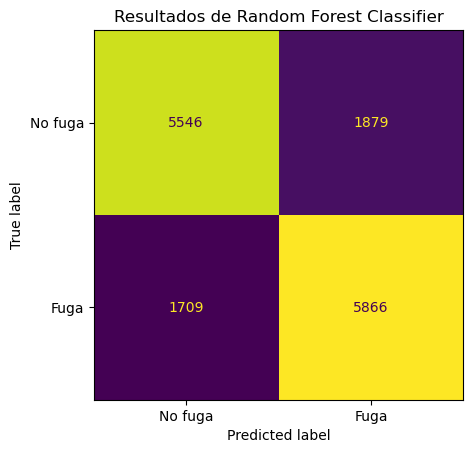

In [139]:
ConfusionMatrixDisplay(
    rf_results[0]['confusion_matrix'],
    display_labels=['No fuga', 'Fuga']
).plot(colorbar=False)

plt.title('Resultados de Random Forest Classifier')

#### _Gaussian NB Classifier_

Text(0.5, 1.0, 'Resultados de Gaussian NB Classifier')

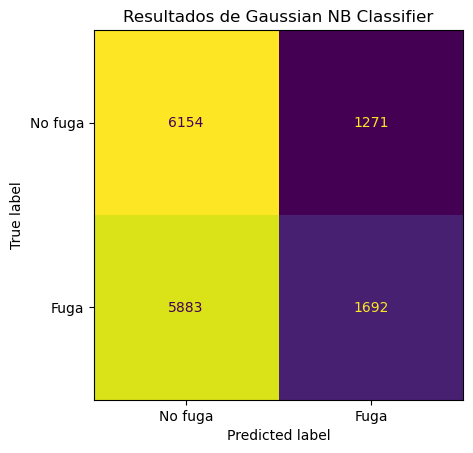

In [140]:
ConfusionMatrixDisplay(
    gnb_results[0]['confusion_matrix'],
    display_labels=['No fuga', 'Fuga']
).plot(colorbar=False)

plt.title('Resultados de Gaussian NB Classifier')

#### _KNN Classifier_

Text(0.5, 1.0, 'Resultados de KNN Classifier')

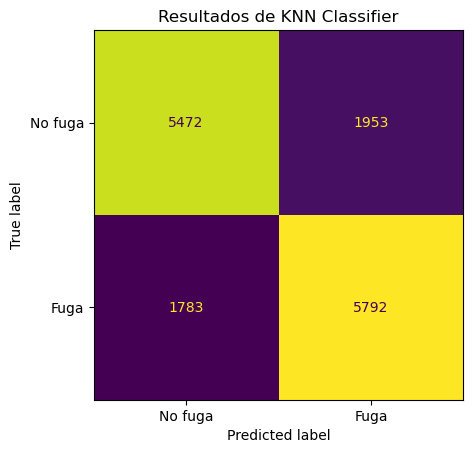

In [141]:
ConfusionMatrixDisplay(
    knn_results[0]['confusion_matrix'],
    display_labels=['No fuga', 'Fuga']
).plot(colorbar=False)

plt.title('Resultados de KNN Classifier')

#### _XGBoost Classifier_

Text(0.5, 1.0, 'Resultados de XGBoost Classifier')

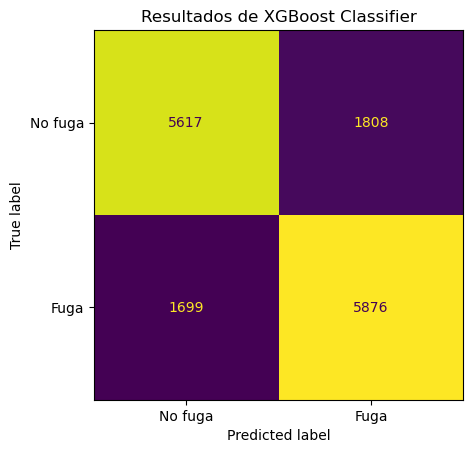

In [142]:
ConfusionMatrixDisplay(
    xgb_results[0]['confusion_matrix'],
    display_labels=['No fuga', 'Fuga']
).plot(colorbar=False)

plt.title('Resultados de XGBoost Classifier')

#### _Ensemble Classifier_

Text(0.5, 1.0, 'Resultados de Ensemble Classifier')

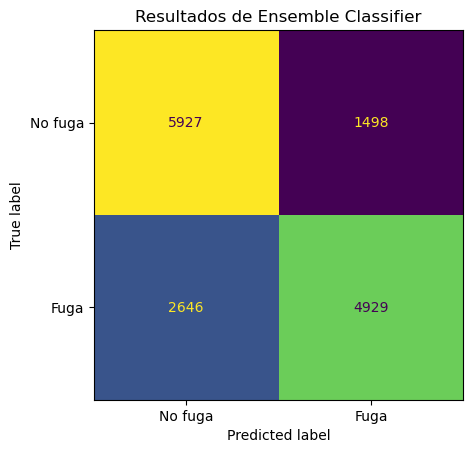

In [143]:
ConfusionMatrixDisplay(
    vot_results[0]['confusion_matrix'],
    display_labels=['No fuga', 'Fuga']
).plot(colorbar=False)

plt.title('Resultados de Ensemble Classifier')

#### Modelo DL unicapa

Text(0.5, 1.0, 'Resultados de red unicapa')

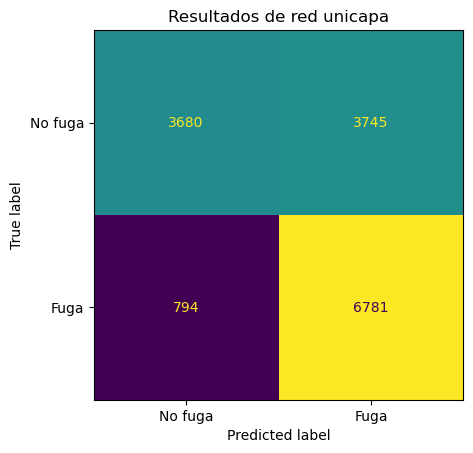

In [147]:
ConfusionMatrixDisplay(
    dl_unil_results[0]['confusion_matrix'],
    display_labels=['No fuga', 'Fuga']
).plot(colorbar=False)

plt.title('Resultados de red unicapa')

#### Modelo DL multicapa

Text(0.5, 1.0, 'Resultados de red multicapa')

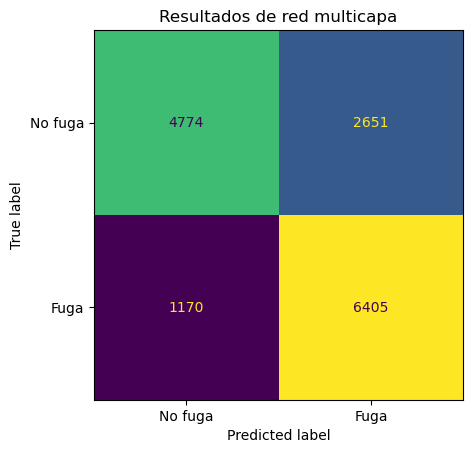

In [148]:
ConfusionMatrixDisplay(
    dl_multil_results[0]['confusion_matrix'],
    display_labels=['No fuga', 'Fuga']
).plot(colorbar=False)

plt.title('Resultados de red multicapa')

#### Modelo DL _ensemble_

Text(0.5, 1.0, 'Resultados de red ensemble')

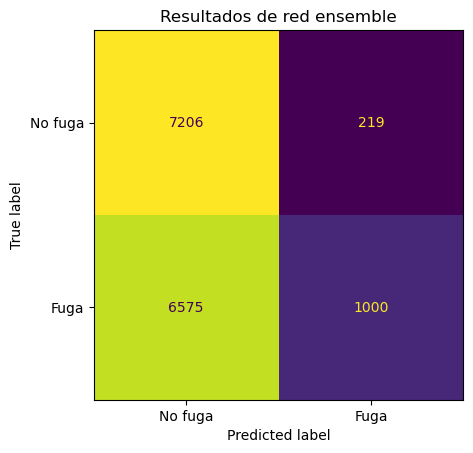

In [149]:
ConfusionMatrixDisplay(
    dl_vot_results[0]['confusion_matrix'],
    display_labels=['No fuga', 'Fuga']
).plot(colorbar=False)

plt.title('Resultados de red ensemble')

### Otros

In [167]:
display_seg_list = [
    ('Random Forest',   rf_seg_results),
    ('Gaussian NB',     gnb_seg_results),
    ('KNN',             knn_seg_results),
    ('XGBoost',         xgb_seg_results),
    ('Ensemble',        vot_seg_results),
    ('DL unilayer',     dl_unil_seg_results),
    ('DL multilayer',   dl_multil_seg_results),
    ('DL ensemble',     dl_vot_seg_results)
]

In [168]:
display_list = [
    ('Random Forest',   rf_results),
    ('Gaussian NB',     gnb_results),
    ('KNN',             knn_results),
    ('XGBoost',         xgb_results),
    ('Ensemble',        vot_results),
    ('DL unilayer',     dl_unil_results),
    ('DL multilayer',   dl_multil_results),
    ('DL ensemble',     dl_vot_results)
]

#### Comparativa de falsos positivos

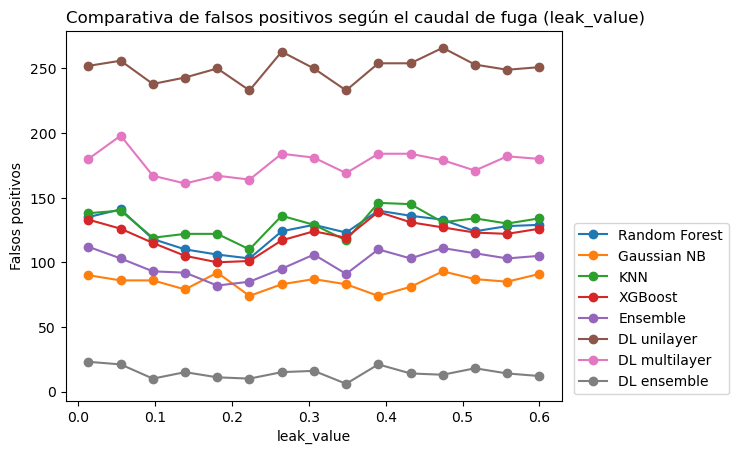

In [222]:
for (name, results) in display_seg_list:
    plt.plot(
        [df['leak_value'] for df in results],
        [df['false_positives'] for df in results],
        marker='o',
        label=name
    )

plt.title('Comparativa de falsos positivos según el caudal de fuga (leak_value)', loc='left')
plt.xlabel('leak_value')
plt.ylabel('Falsos positivos')

plt.legend(loc='upper right', bbox_to_anchor=(1.35, 0.5))

plt.show()

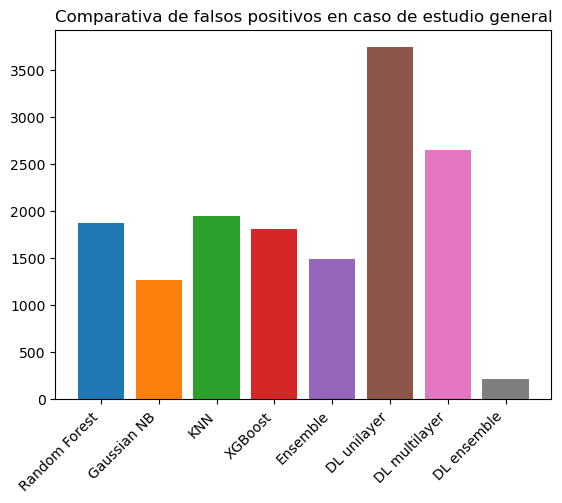

In [223]:
for (name, results) in display_list:
    plt.bar(name, results[0]['false_positives'])

plt.xticks(rotation=45, ha='right')
plt.title('Comparativa de falsos positivos en caso de estudio general', loc='left')

plt.show()

#### Comparativa de sensibilidad (_recall_)

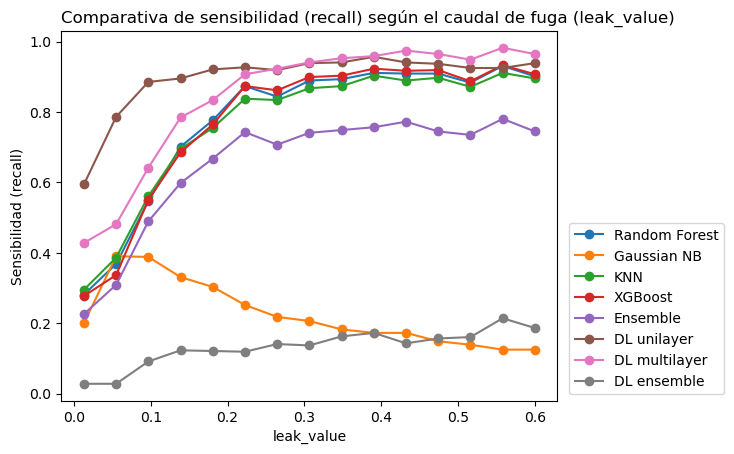

In [224]:
for (name, results) in display_seg_list:
    plt.plot(
        [df['leak_value'] for df in results],
        [df['recall_score'] for df in results],
        marker='o',
        label=name
    )

plt.title('Comparativa de sensibilidad (recall) según el caudal de fuga (leak_value)', loc='left')
plt.xlabel('leak_value')
plt.ylabel('Sensibilidad (recall)')

plt.legend(loc='upper right', bbox_to_anchor=(1.35, 0.5))

plt.show()

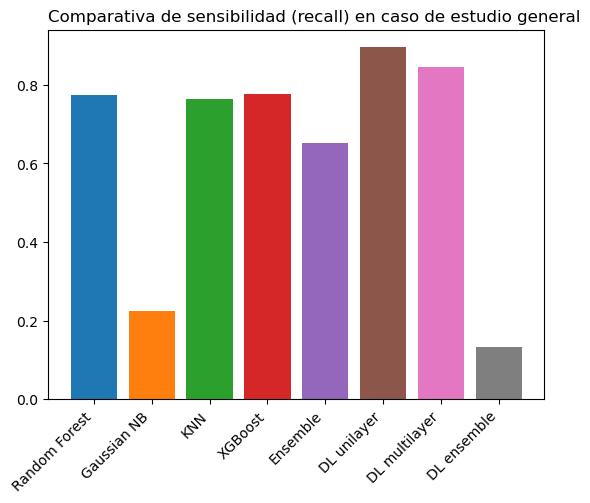

In [225]:
for (name, results) in display_list:
    plt.bar(name, results[0]['recall_score'])

plt.xticks(rotation=45, ha='right')
plt.title('Comparativa de sensibilidad (recall) en caso de estudio general', loc='left')

plt.show()

#### Comparativa de exactitud (_accuracy_)

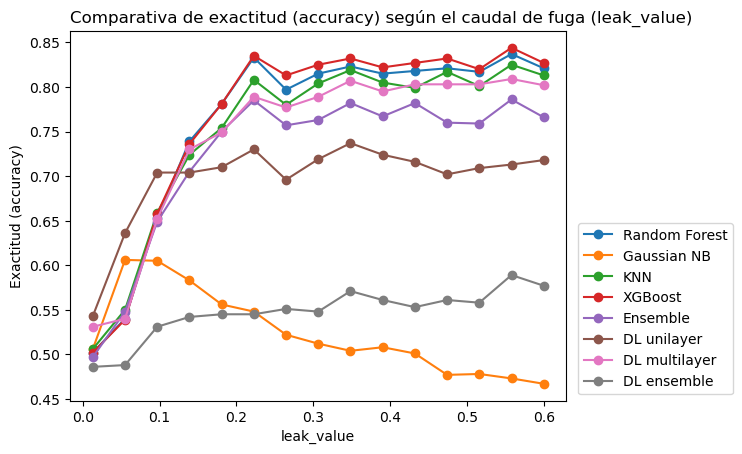

In [226]:
for (name, results) in display_seg_list:
    plt.plot(
        [df['leak_value'] for df in results],
        [df['accuracy_score'] for df in results],
        marker='o',
        label=name
    )

plt.title('Comparativa de exactitud (accuracy) según el caudal de fuga (leak_value)', loc='left')
plt.xlabel('leak_value')
plt.ylabel('Exactitud (accuracy)')

plt.legend(loc='upper right', bbox_to_anchor=(1.35, 0.5))

plt.show()

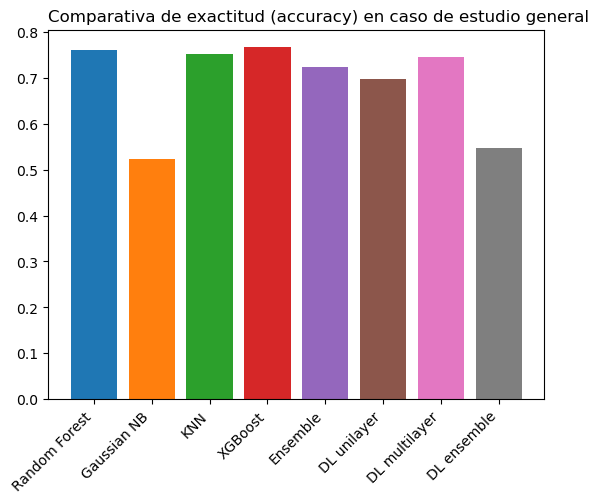

In [227]:
for (name, results) in display_list:
    plt.bar(name, results[0]['accuracy_score'])

plt.xticks(rotation=45, ha='right')
plt.title('Comparativa de exactitud (accuracy) en caso de estudio general', loc='left')

plt.show()

#### Comparativa de días hasta detección de fuga 

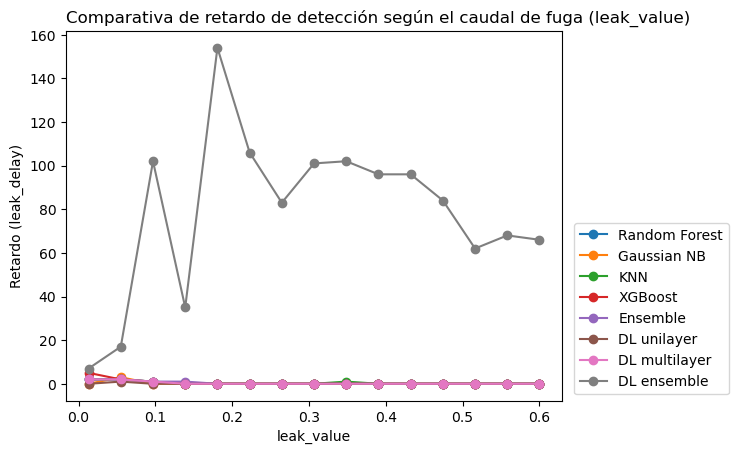

In [228]:
for (name, results) in display_seg_list:
    plt.plot(
        [df['leak_value'] for df in results],
        [df['leak_delay'] for df in results],
        marker='o',
        label=name
    )

plt.title('Comparativa de retardo de detección según el caudal de fuga (leak_value)', loc='left')
plt.xlabel('leak_value')
plt.ylabel('Retardo (leak_delay)')

plt.legend(loc='upper right', bbox_to_anchor=(1.35, 0.5))

plt.show()

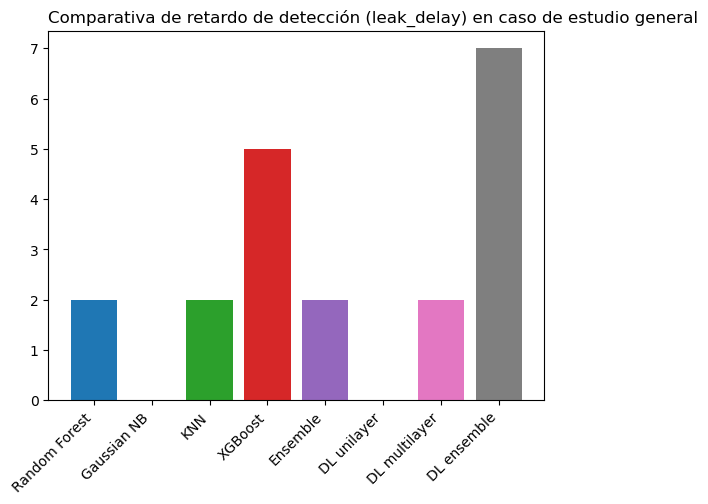

In [229]:
for (name, results) in display_list:
    plt.bar(name, results[0]['leak_delay'])

plt.xticks(rotation=45, ha='right')
plt.title('Comparativa de retardo de detección (leak_delay) en caso de estudio general', loc='left')

plt.show()